In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")
import imageio
import os

In [2]:
def init(x, sigma):
    u = np.exp(-(sigma*x)**2/2)
    return u

def build_x(dx):
    return np.round(np.arange(x_min, x_max + dx, dx), 8)

def build_t(dt):
    dt = round(dt, 8)
    return np.round(np.arange(t_min, t_max + dt, dt), 8)

def LF(t, x, u, v):
    for tt in range(len(t)):
        if tt == 0:
            z = init(x, sigma)
            u[tt, :] = z
            v[tt, :] = np.zeros_like(z)
        elif tt == 1:
            u[tt,:] = u[0, :]
            v[tt,:] = v[0, :]
        else:
            for xx in range(len(x)):
                if xx == len(x) - 1:
                    u[tt, xx] = u[tt, 0]
                    v[tt, xx] = v[tt, 0]
                elif xx == 0:
                    u[tt, xx] = 0
                    v[tt, xx] = 0
                else:
                    u[tt, xx] = u[tt-2, xx] - l*(v[tt-1, xx+1]-v[tt-1, xx-1])-1j*dt*u[tt-1, xx]
                    v[tt, xx] = v[tt-2, xx] - l*(u[tt-1, xx+1]-u[tt-1, xx-1])+1j*dt*v[tt-1, xx]
    return u, v

In [4]:
t_min, t_max = 0, 50
x_min, x_max = -100, 100
sigma = 0.2
h, l = 0.1, 0.1
dx, dt = h, np.round(h*l, 8)

x = build_x(dx)
t = build_t(dt)
u = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
v = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
print("M: {0}, N:{1}".format(len(x), len(t)))
 
u, v = LF(t, x, u, v)

M: 1001, N:5001


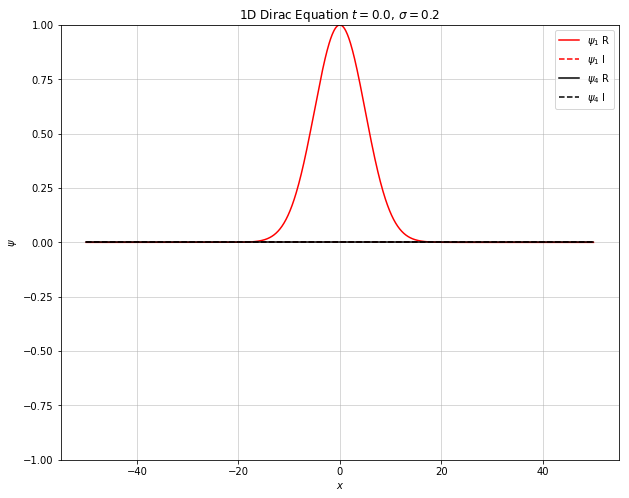

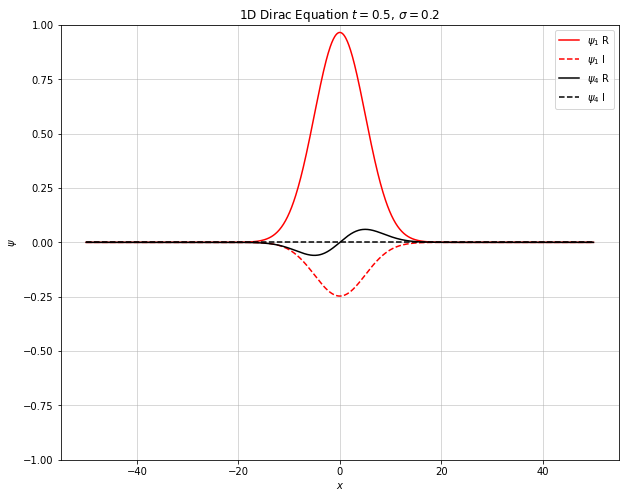

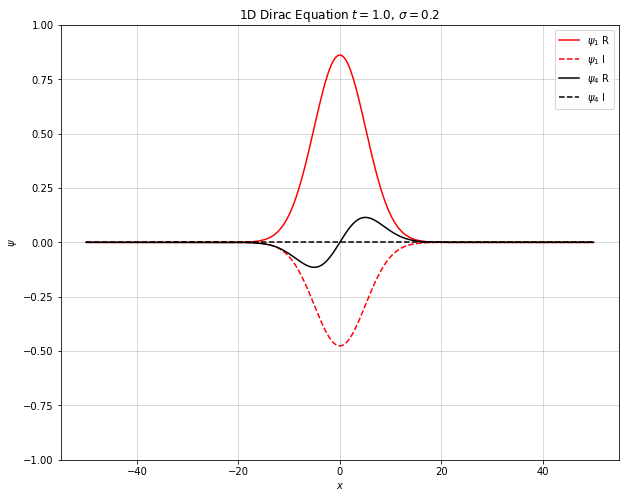

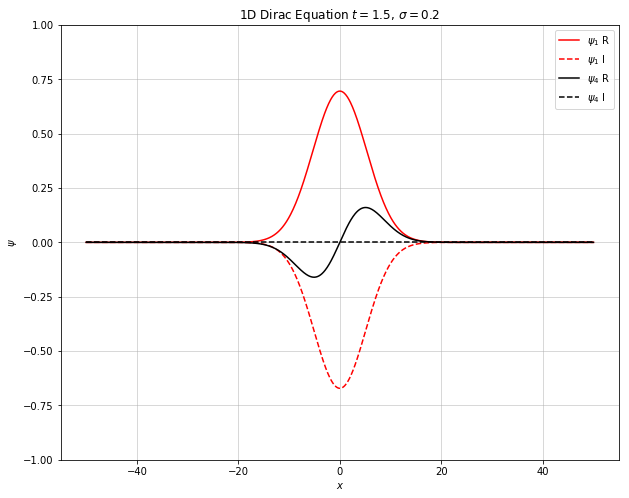

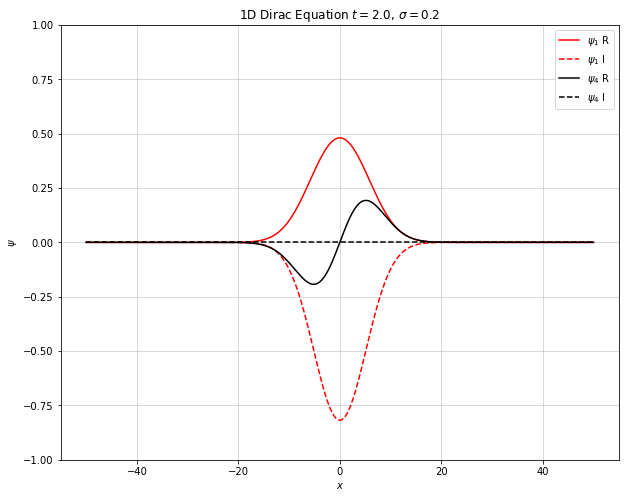

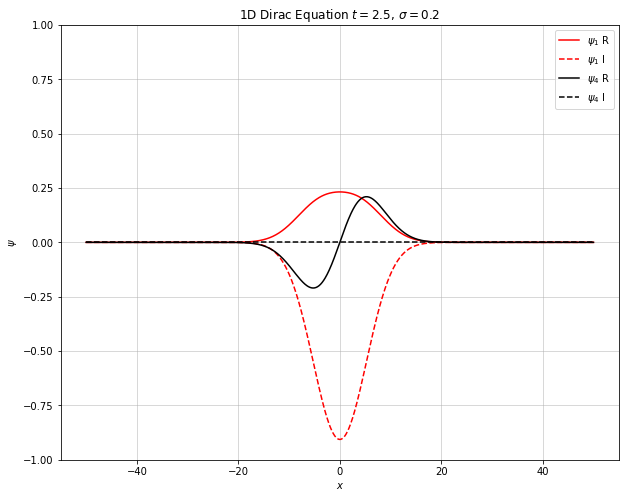

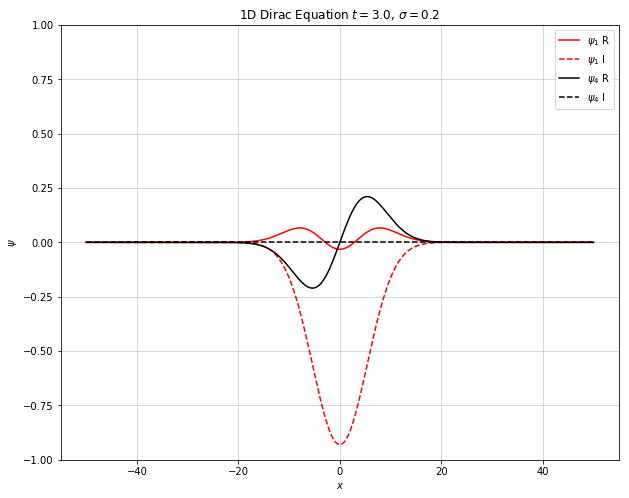

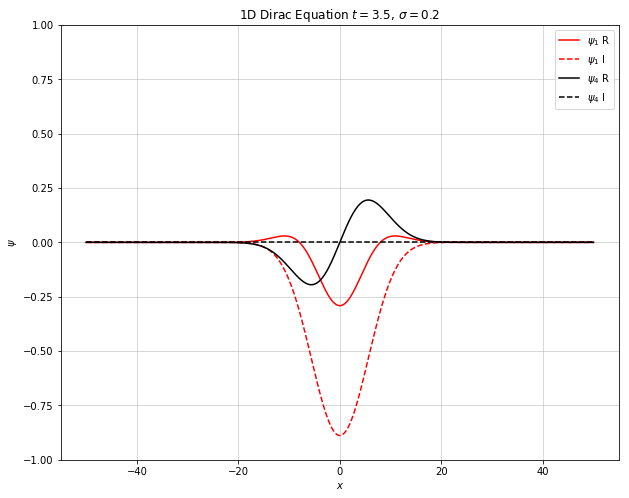

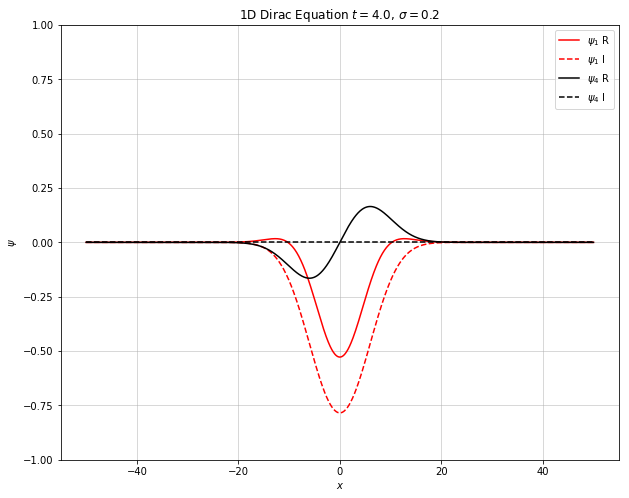

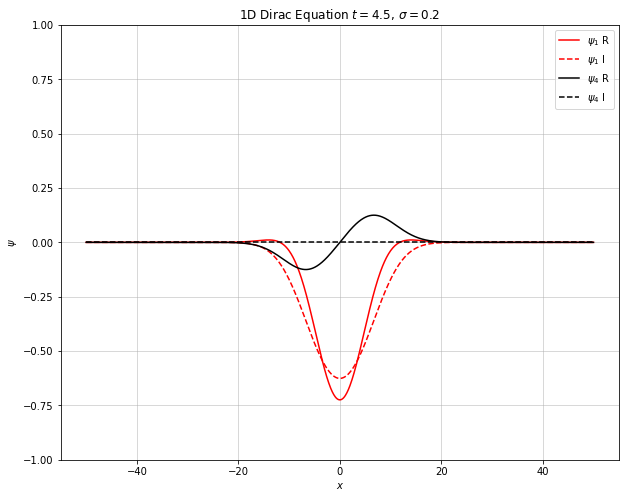

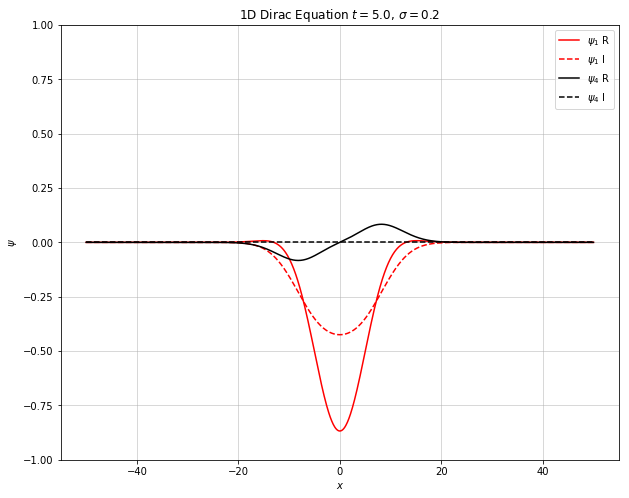

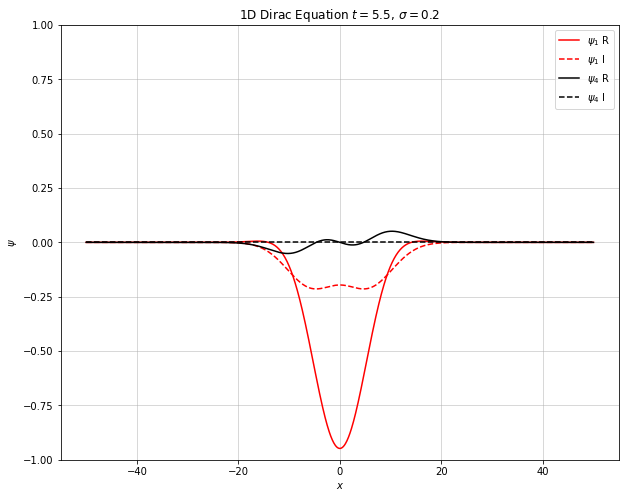

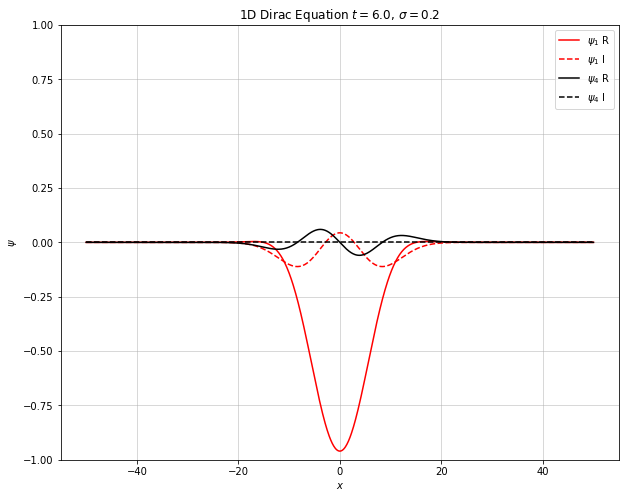

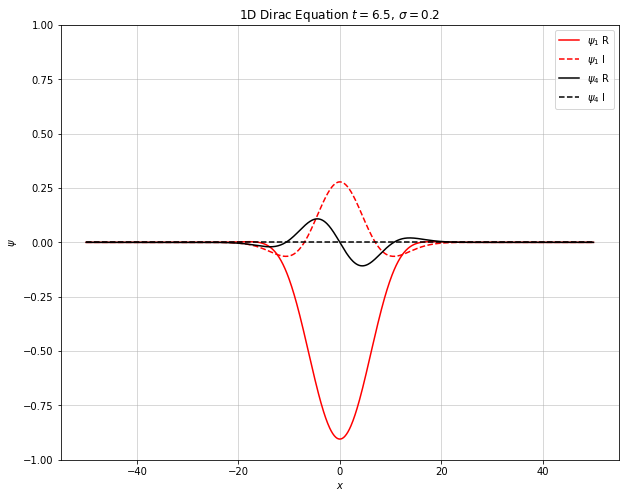

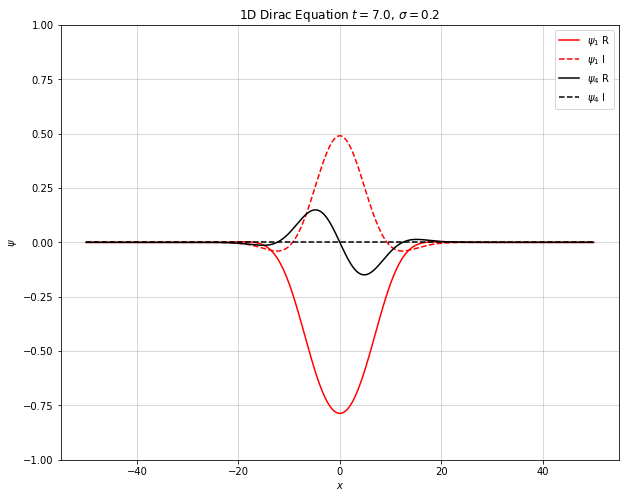

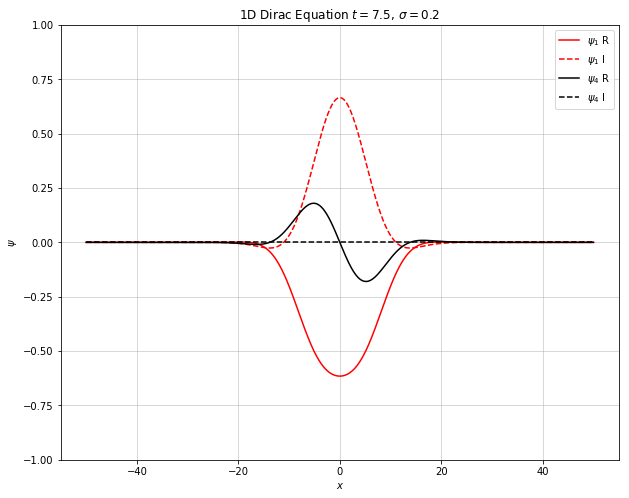

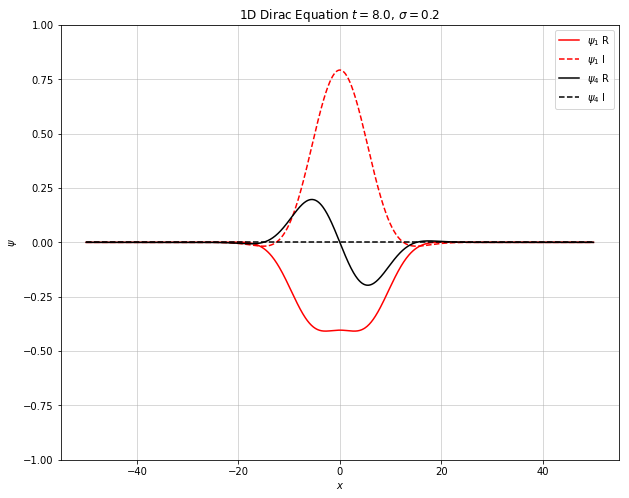

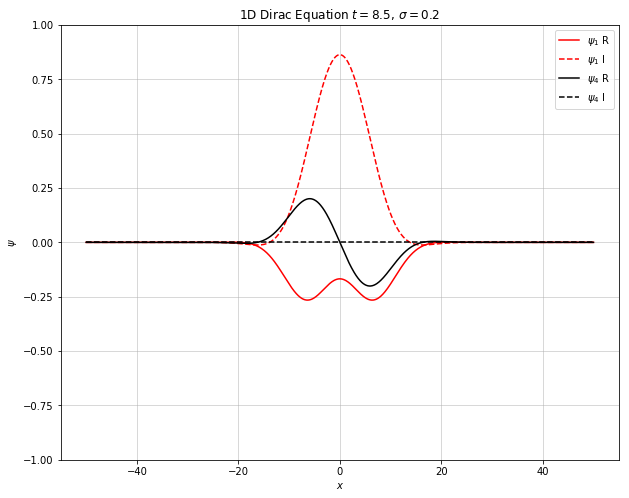

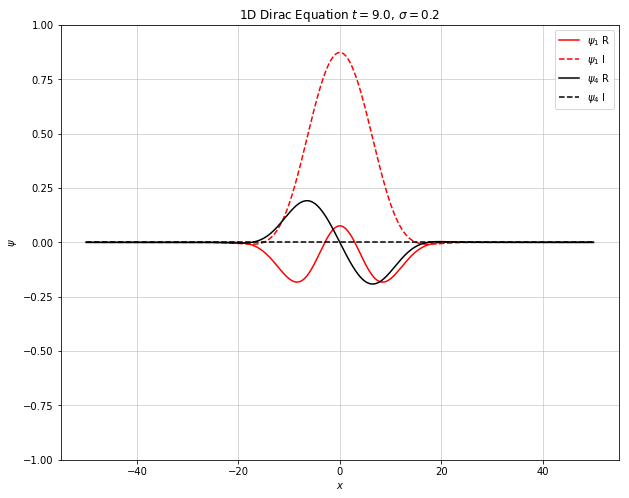

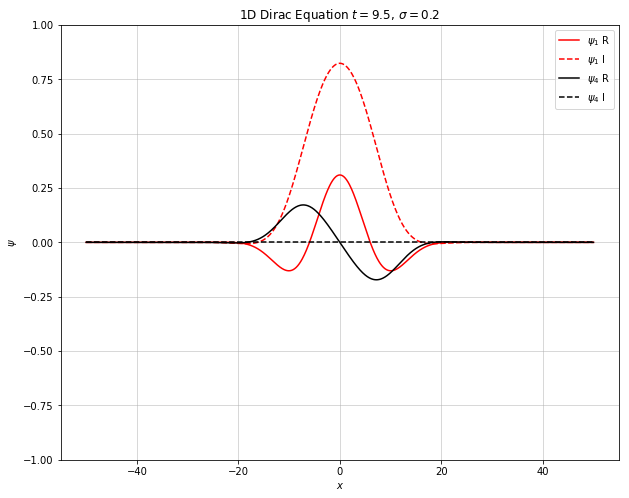

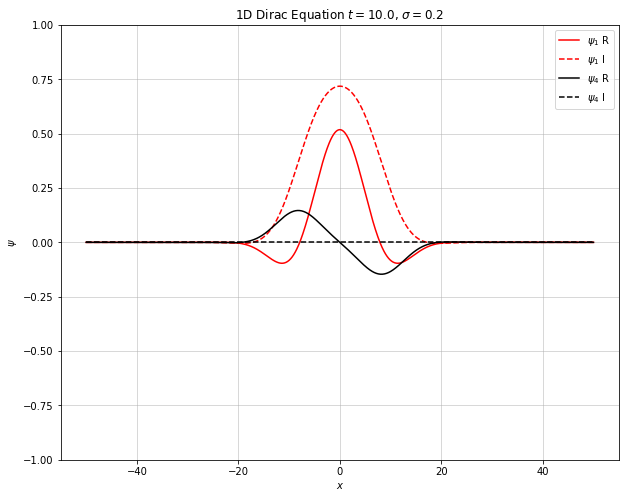

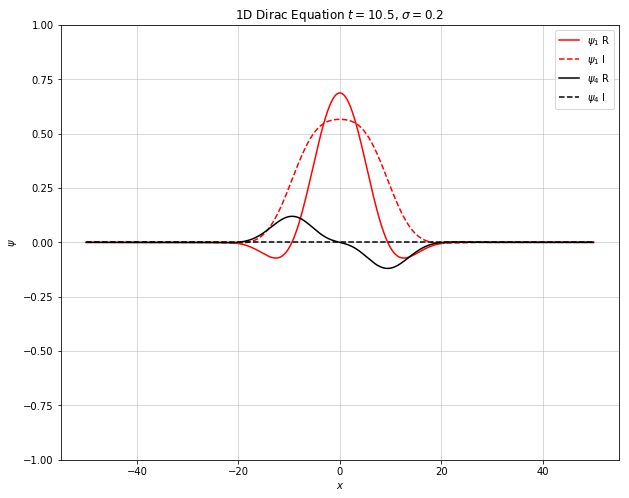

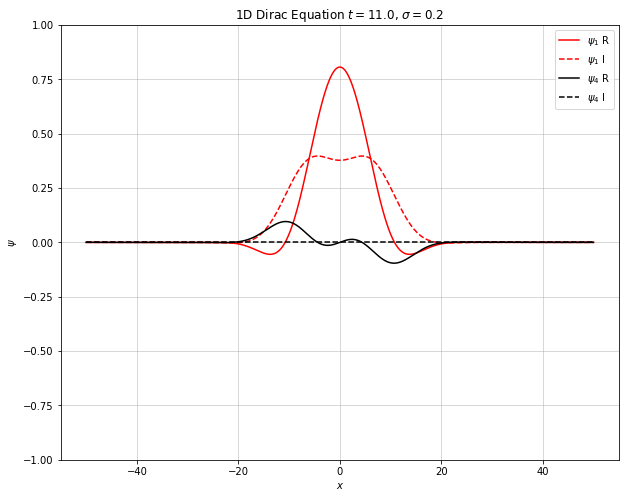

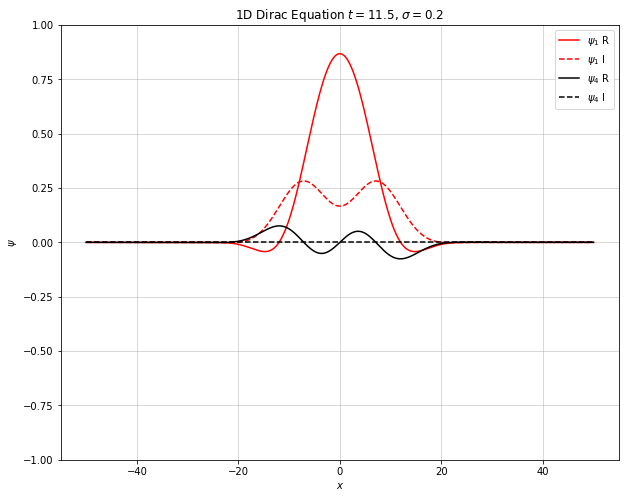

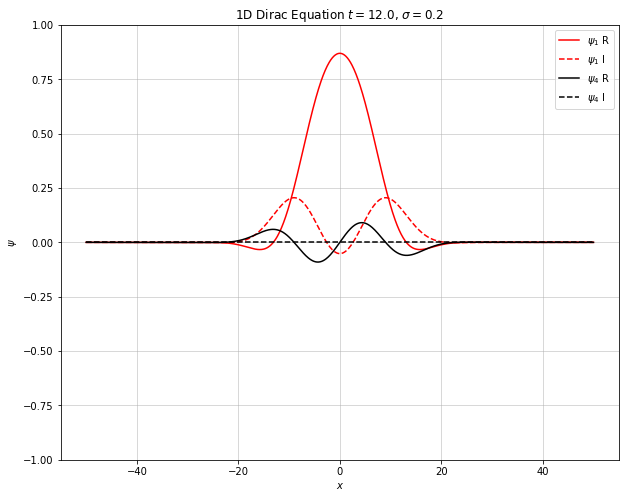

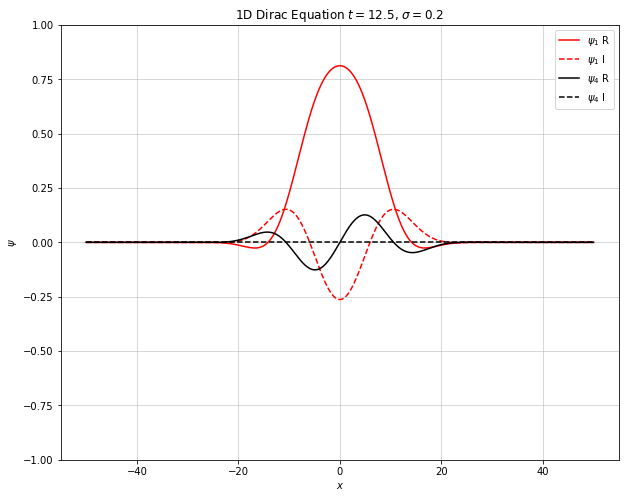

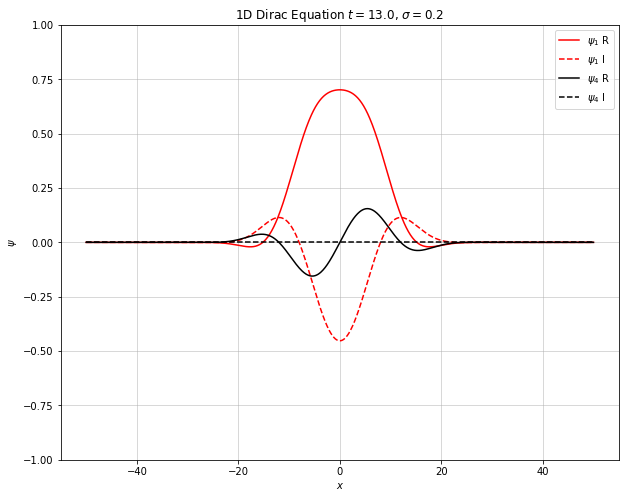

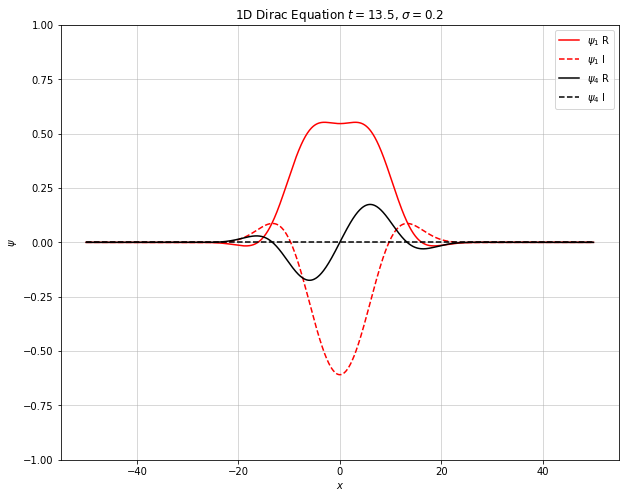

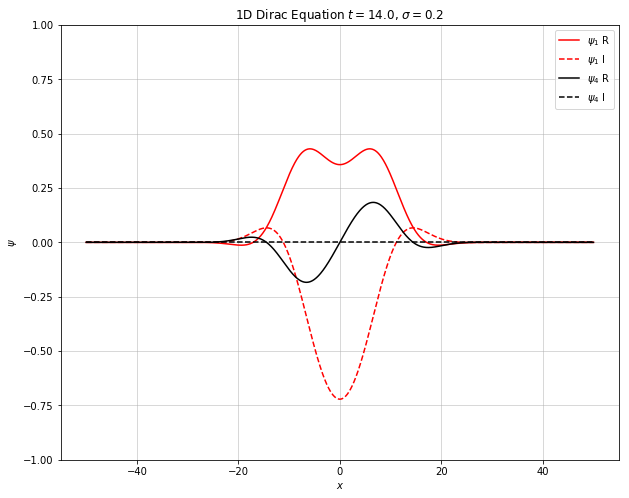

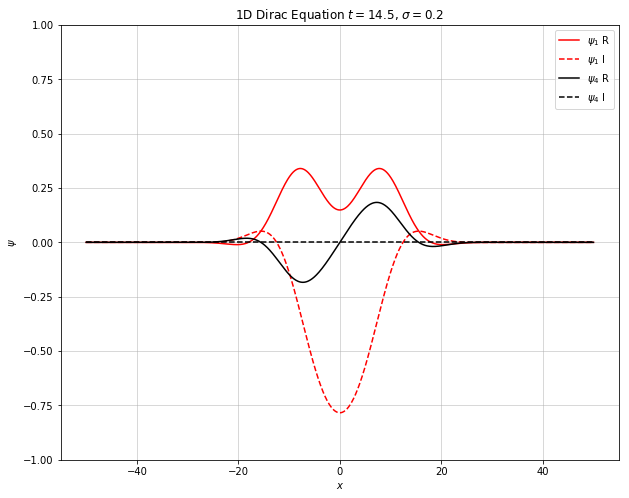

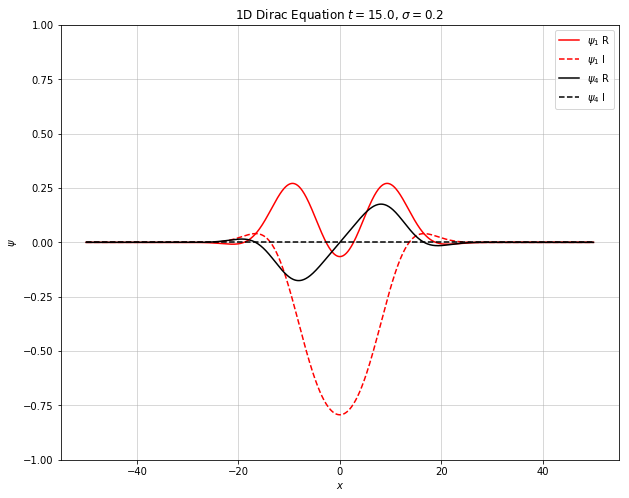

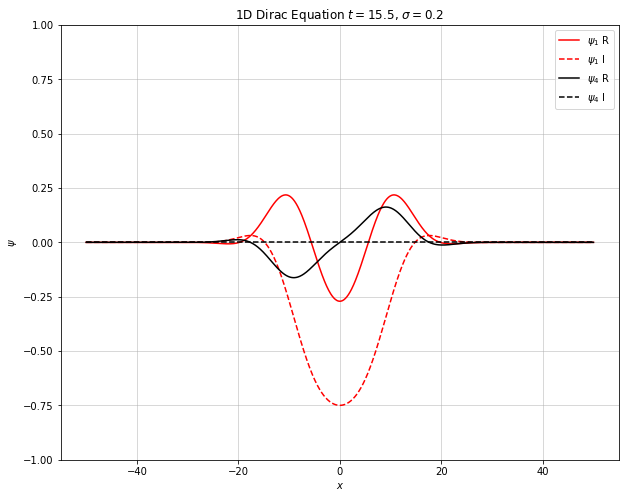

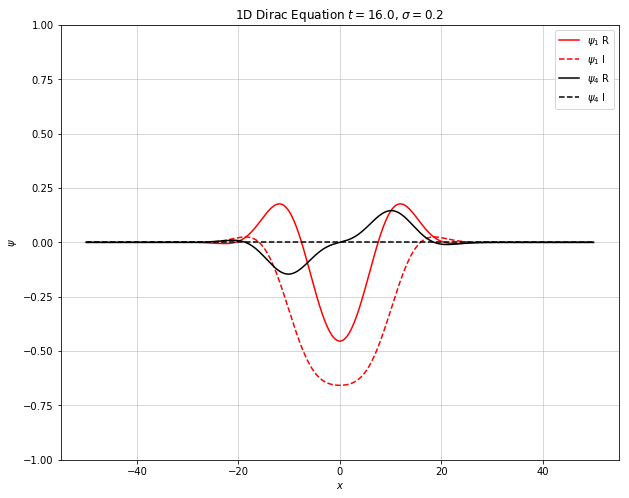

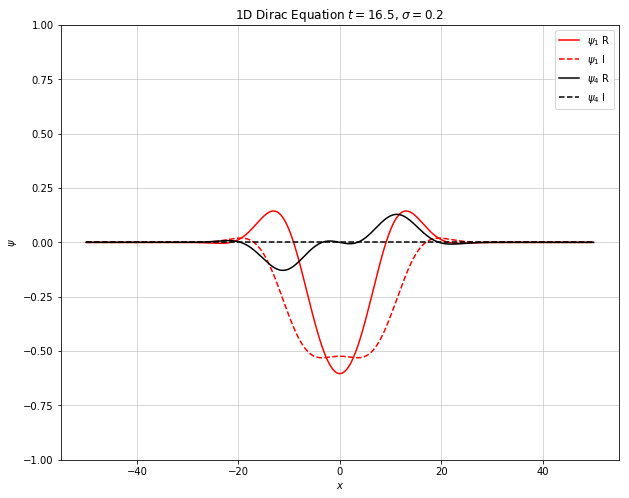

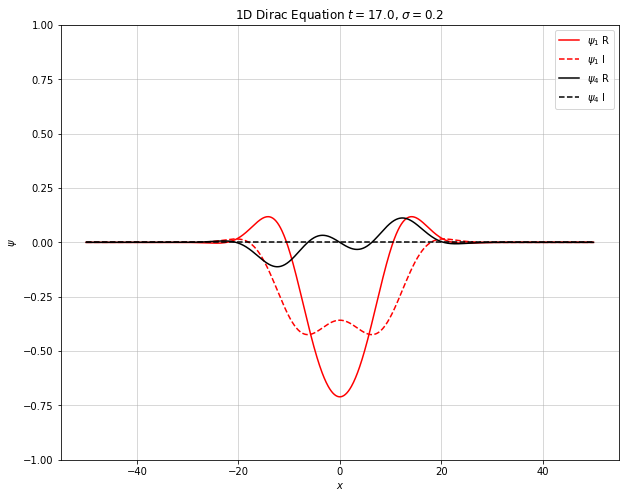

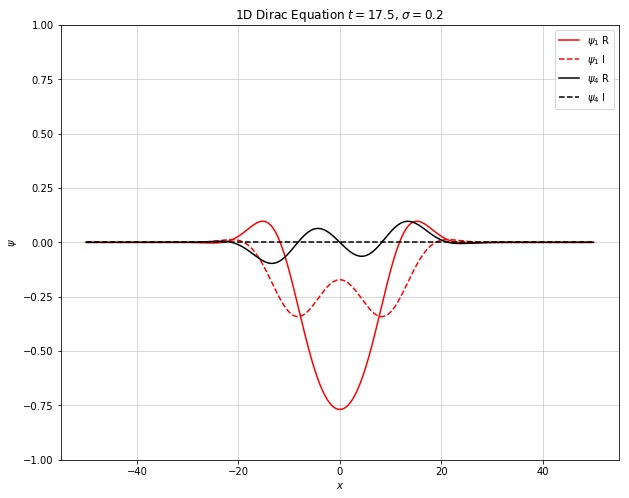

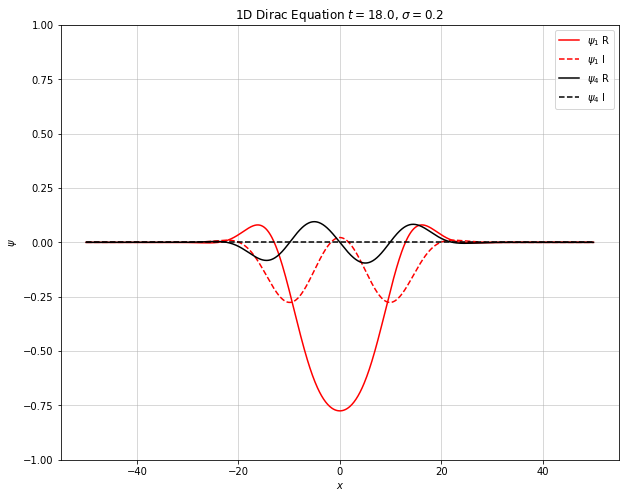

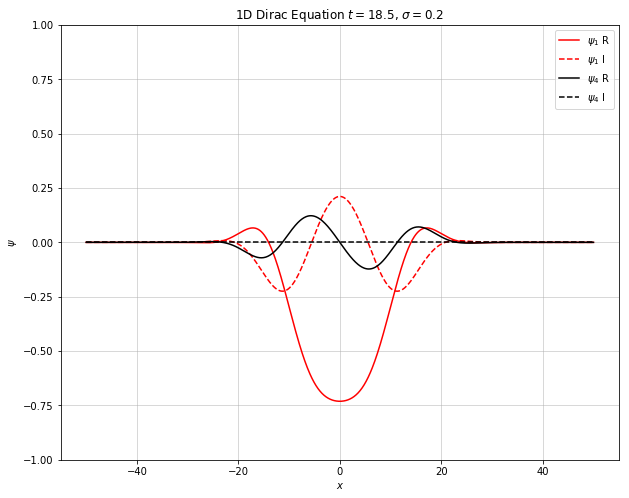

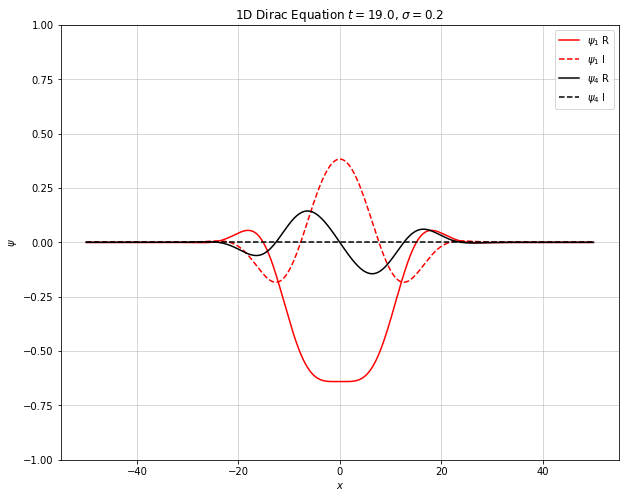

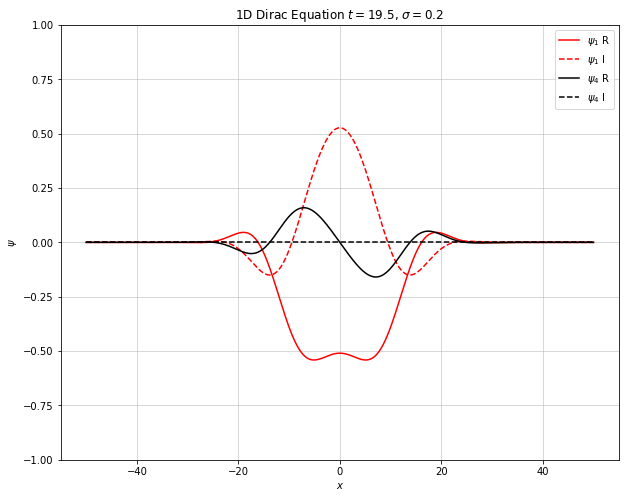

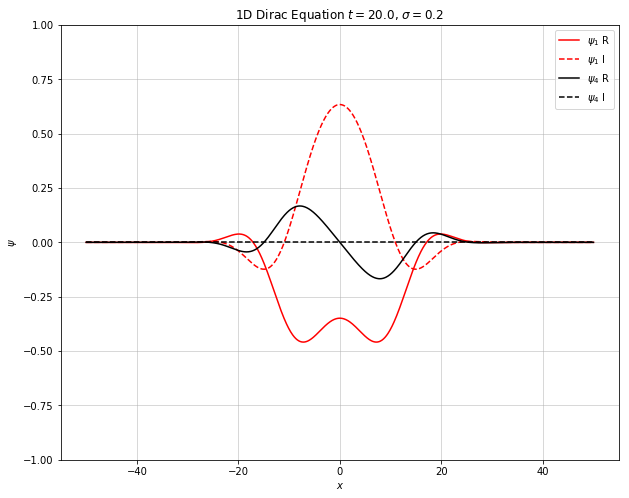

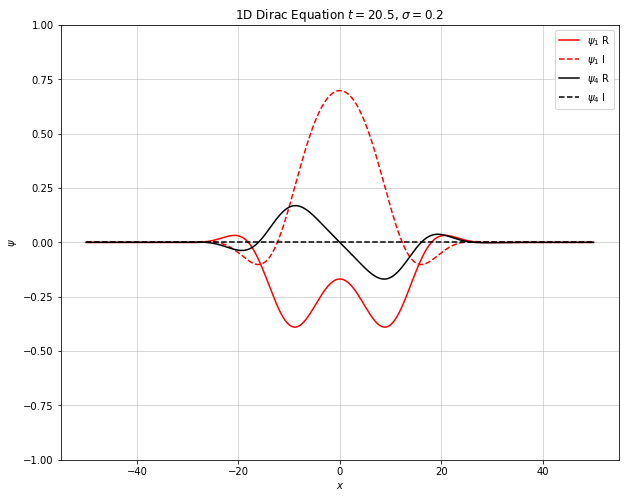

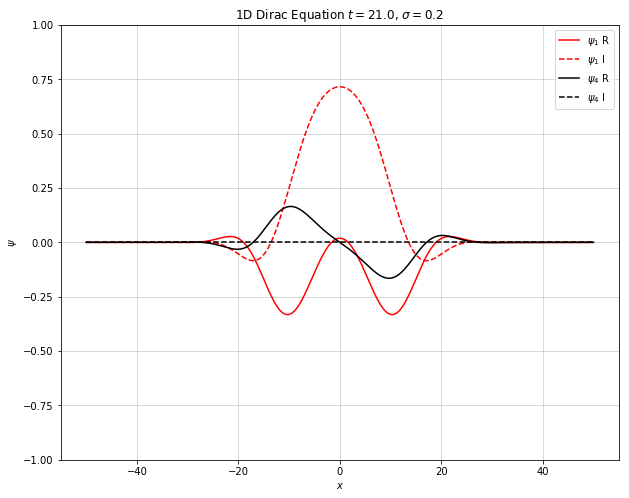

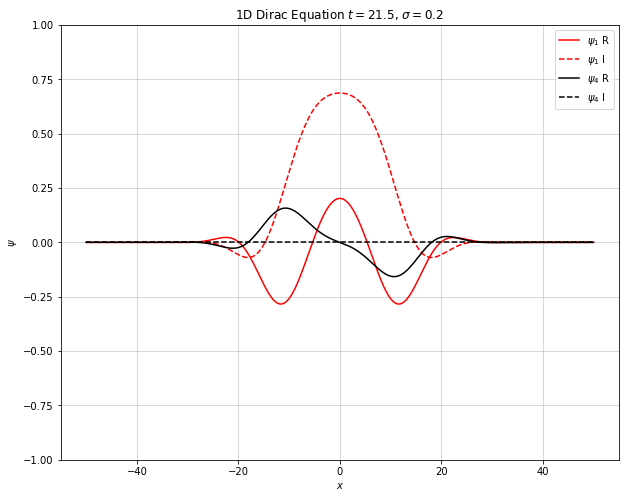

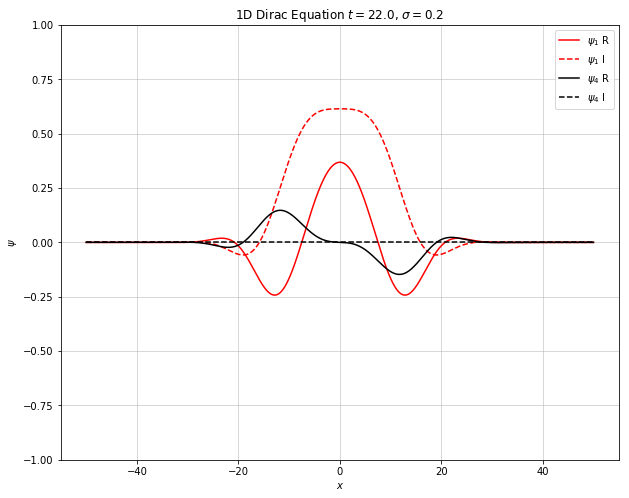

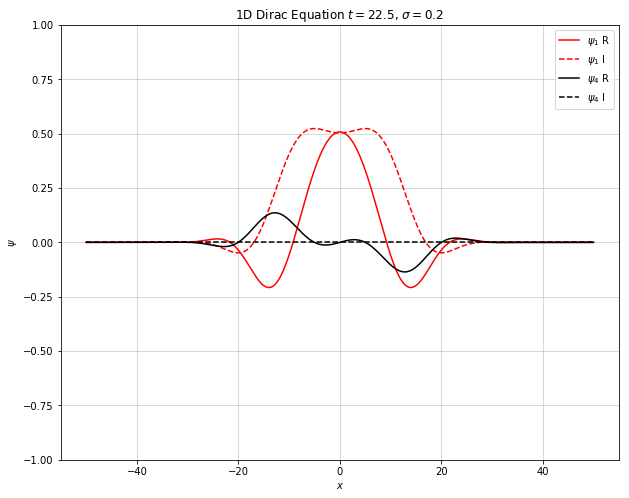

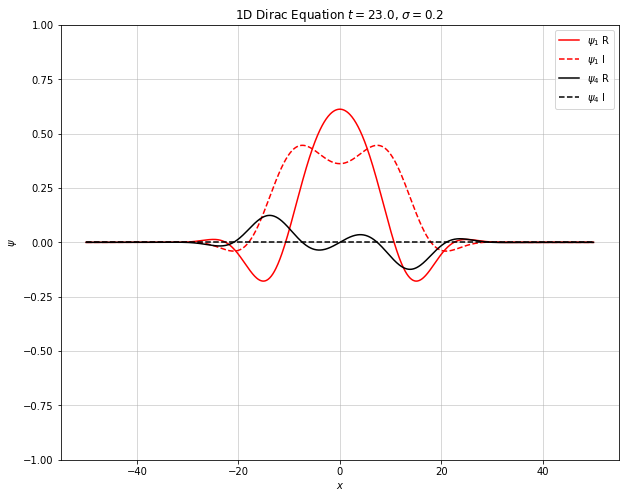

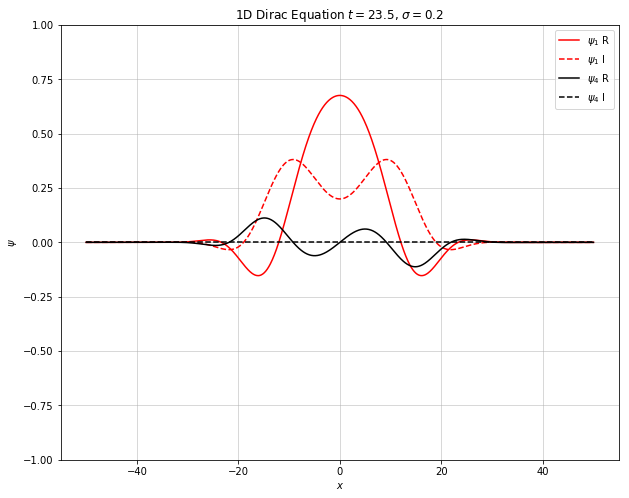

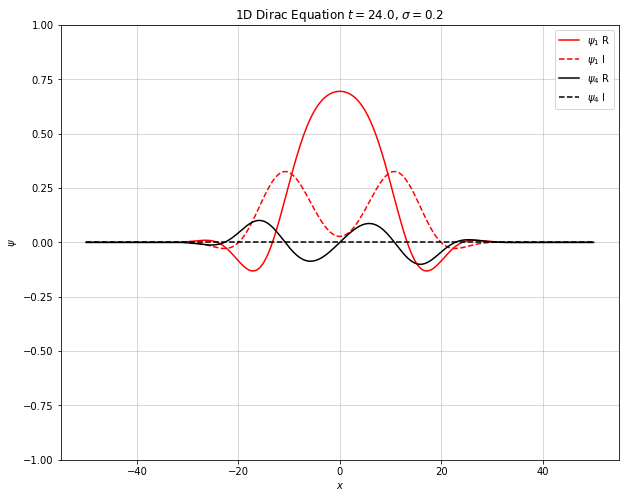

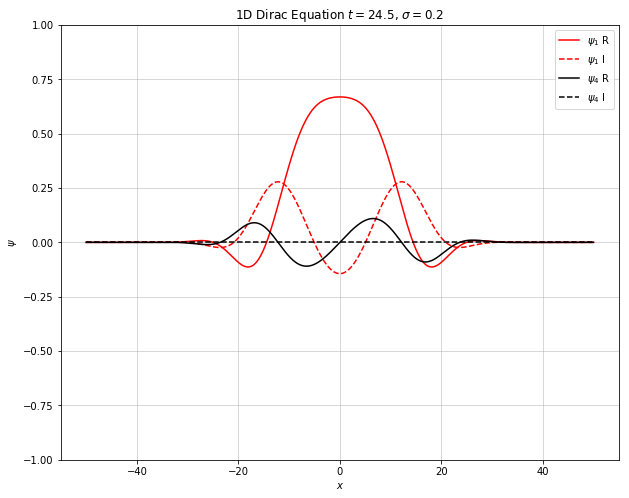

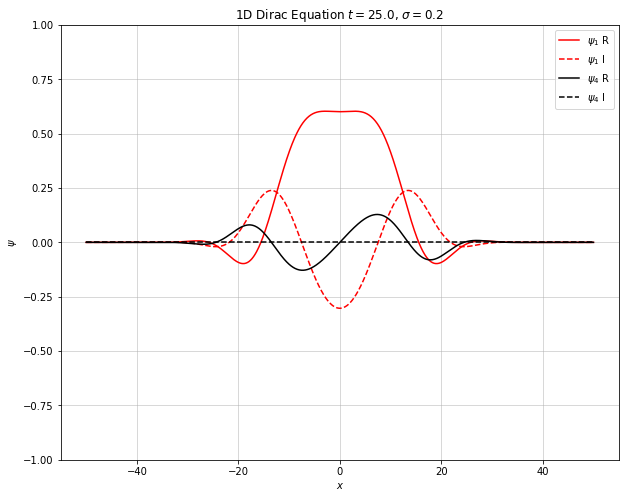

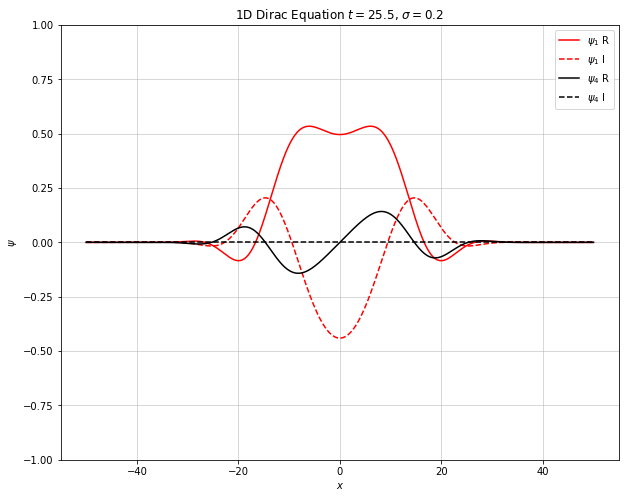

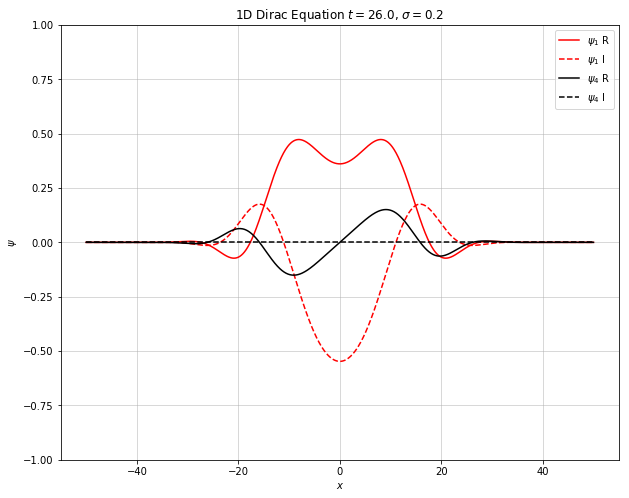

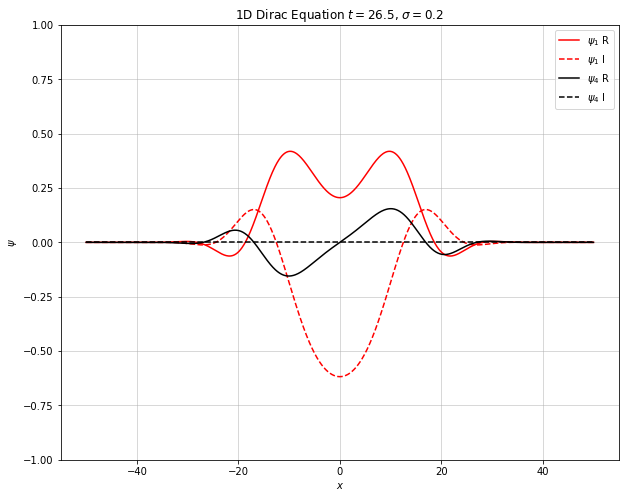

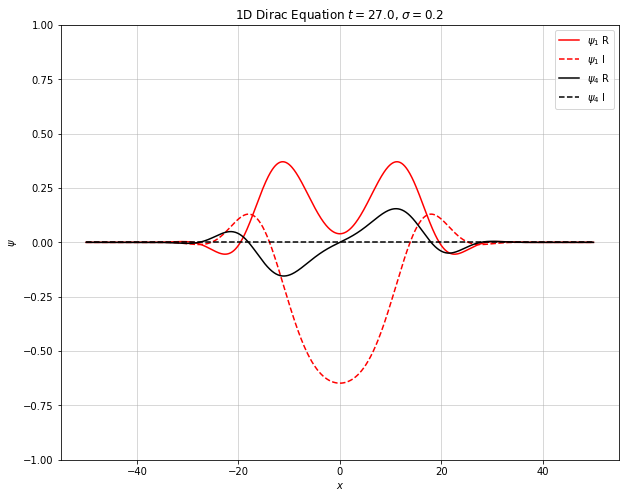

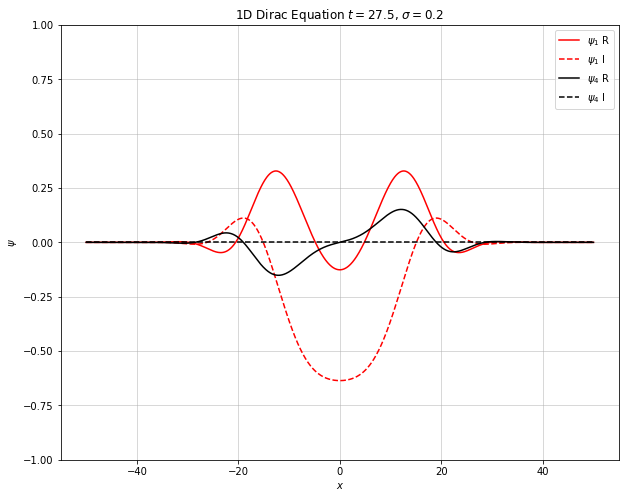

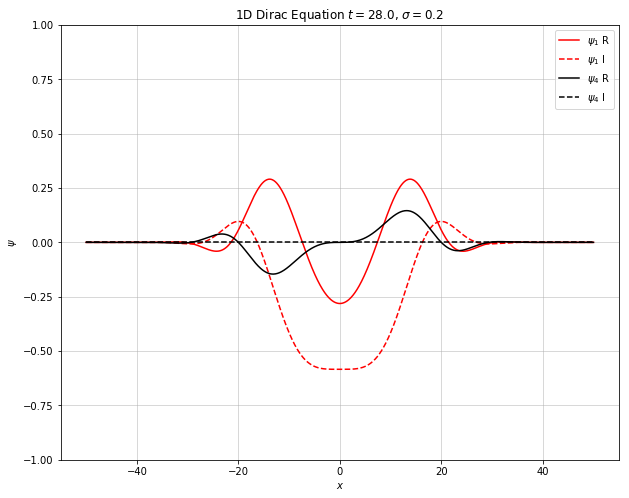

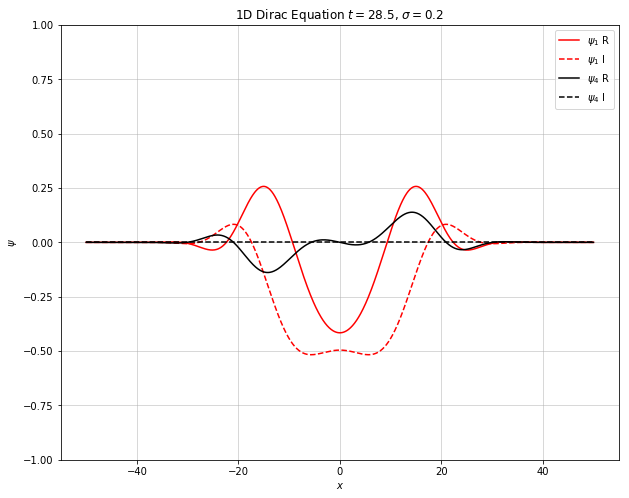

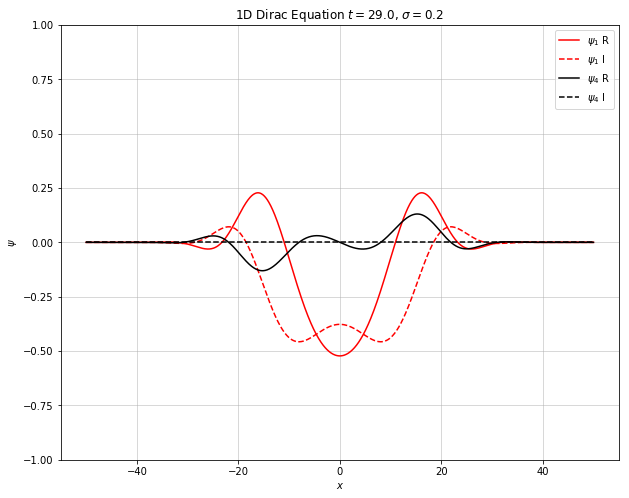

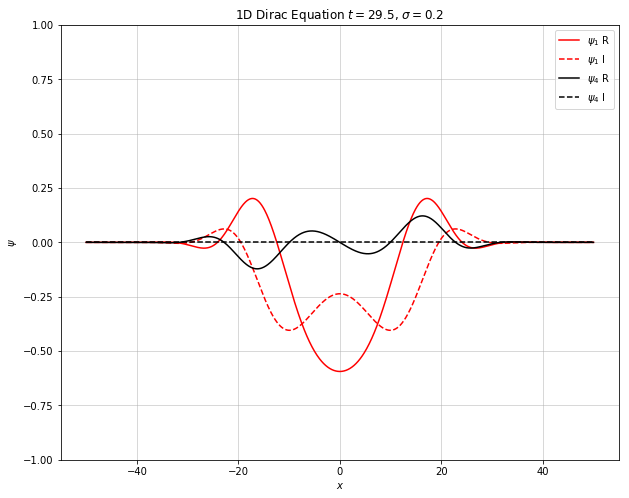

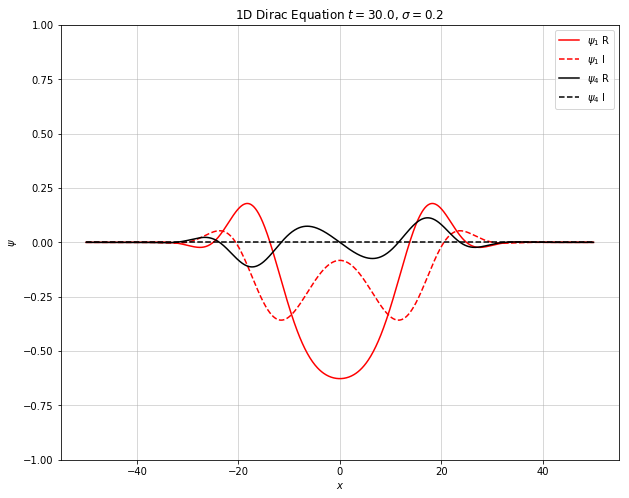

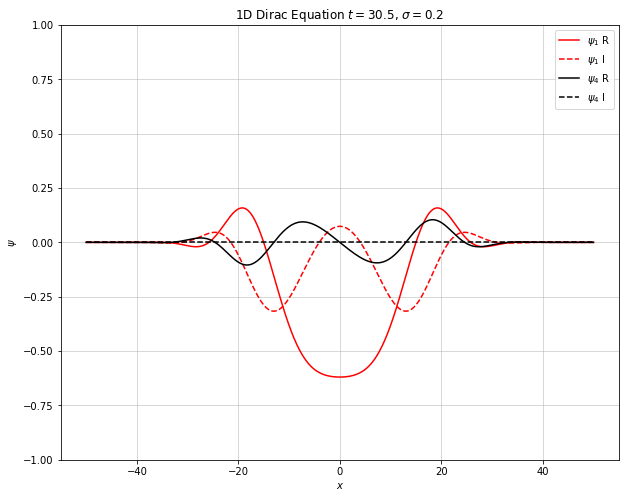

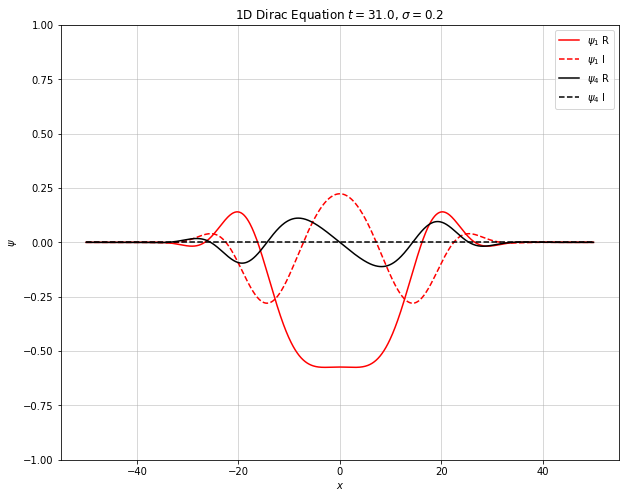

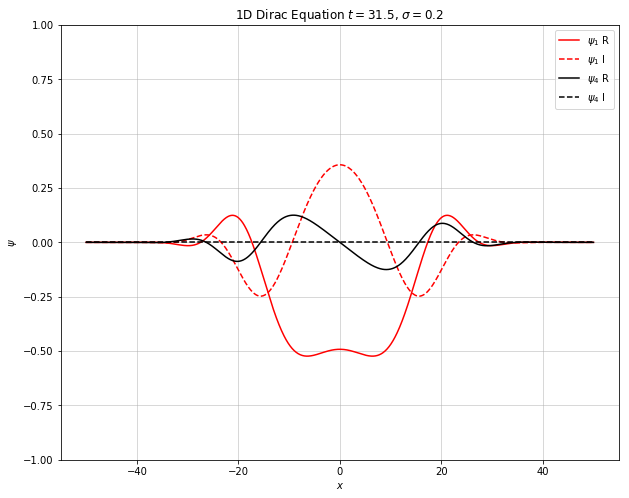

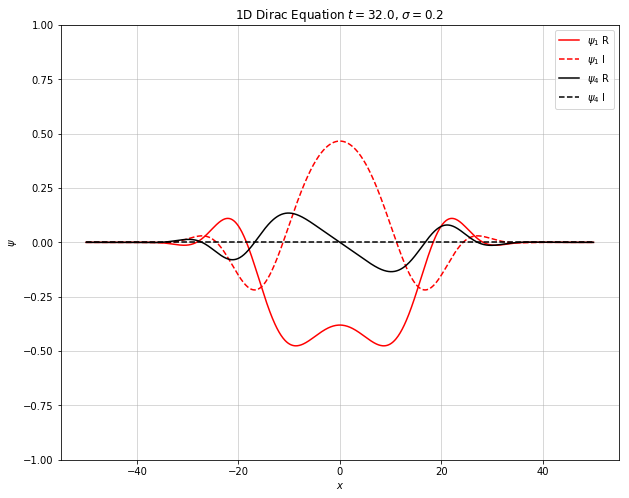

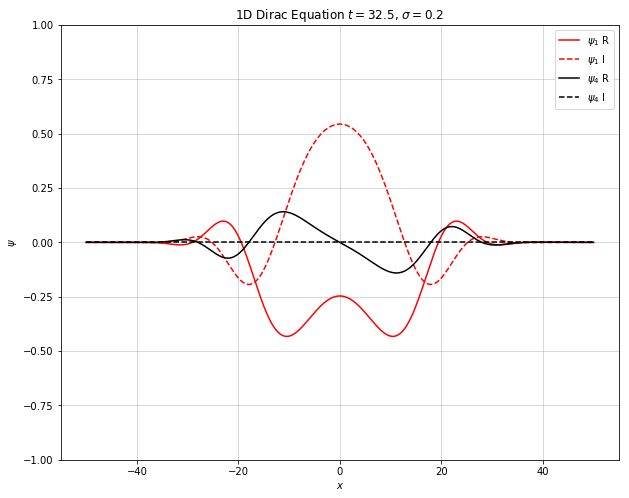

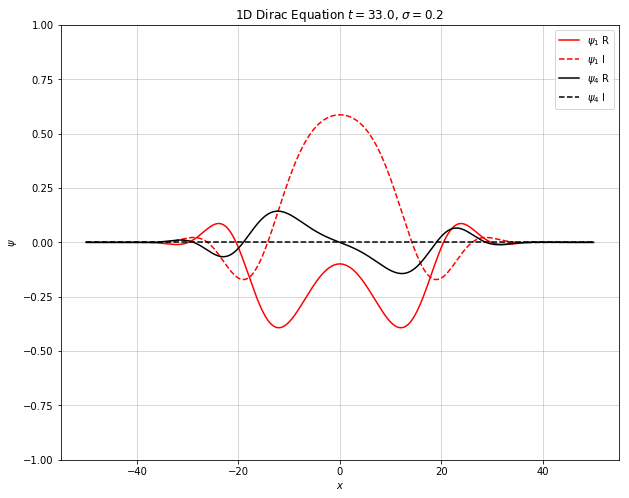

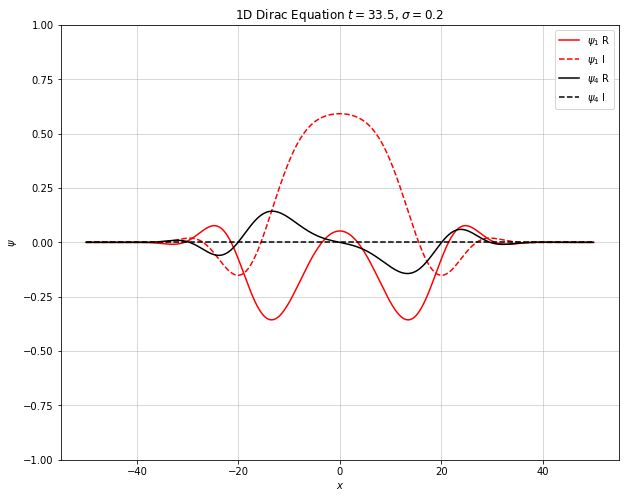

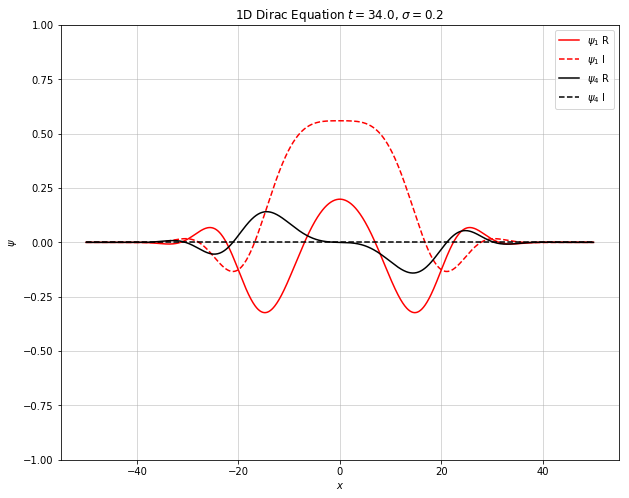

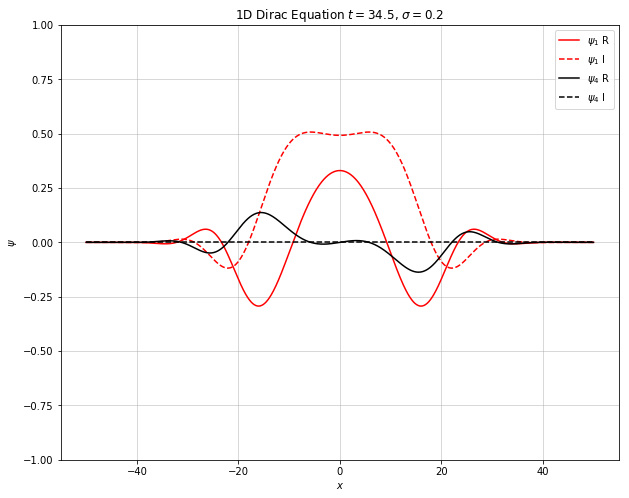

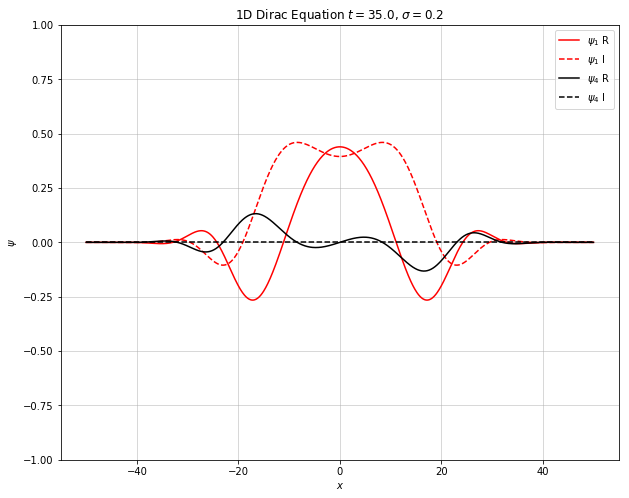

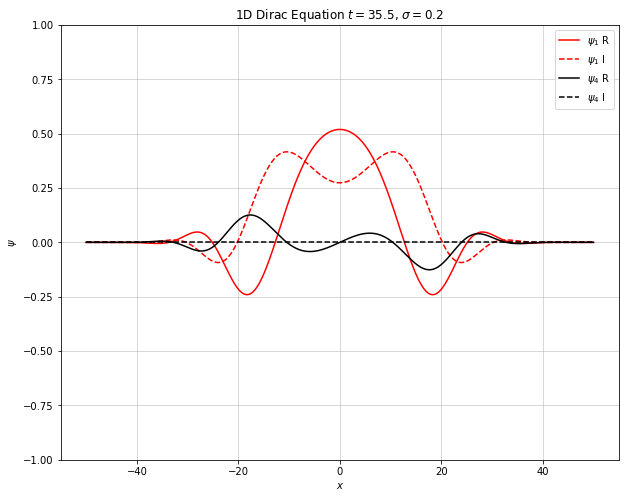

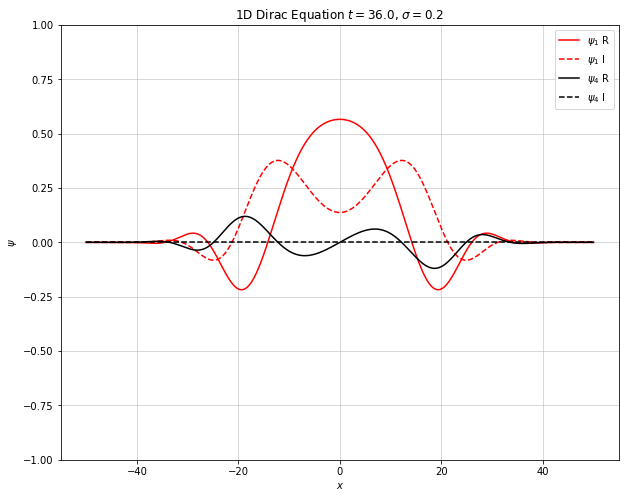

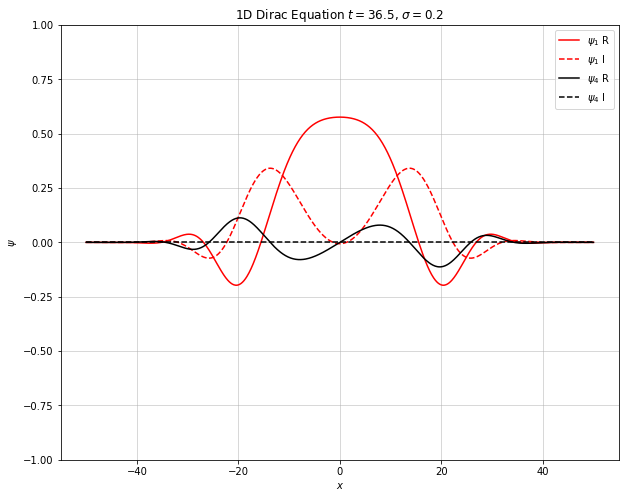

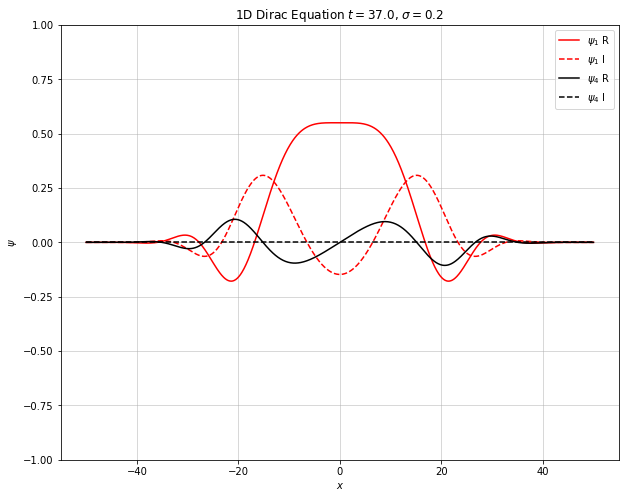

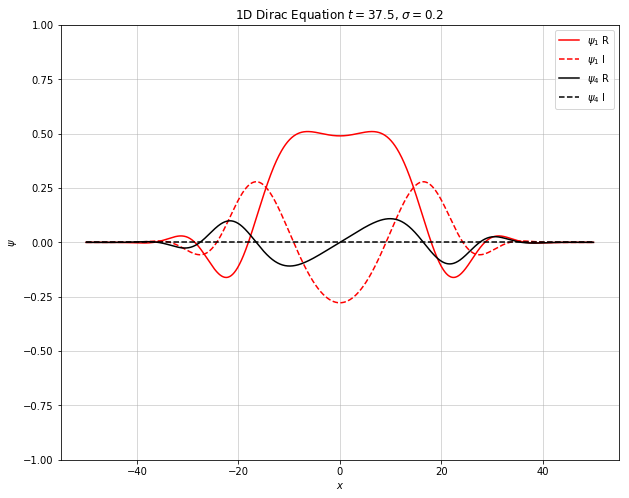

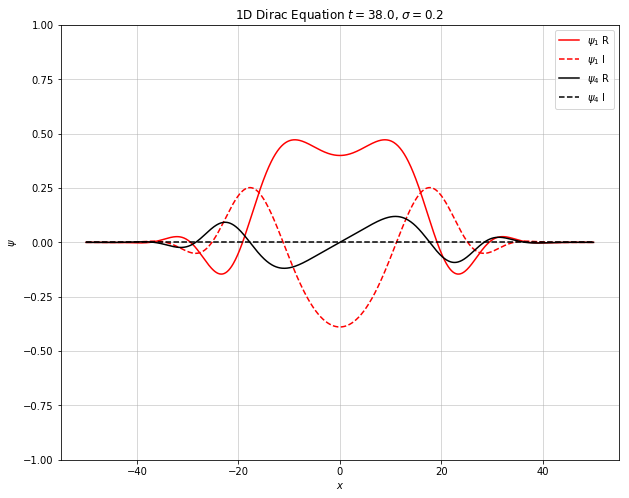

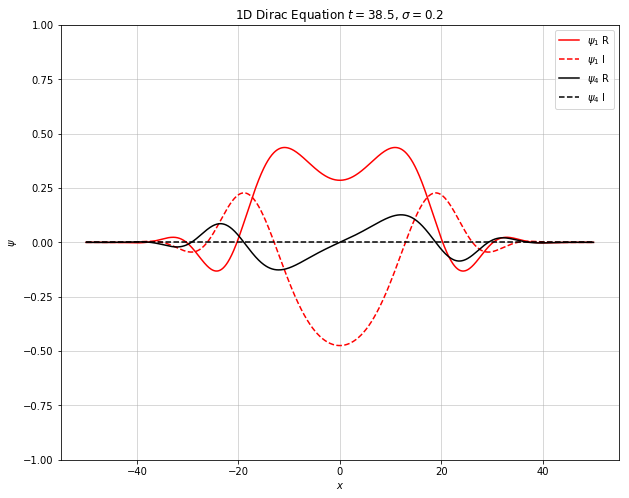

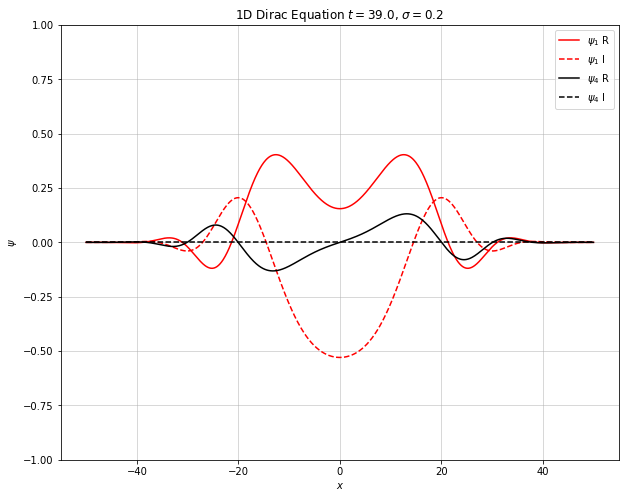

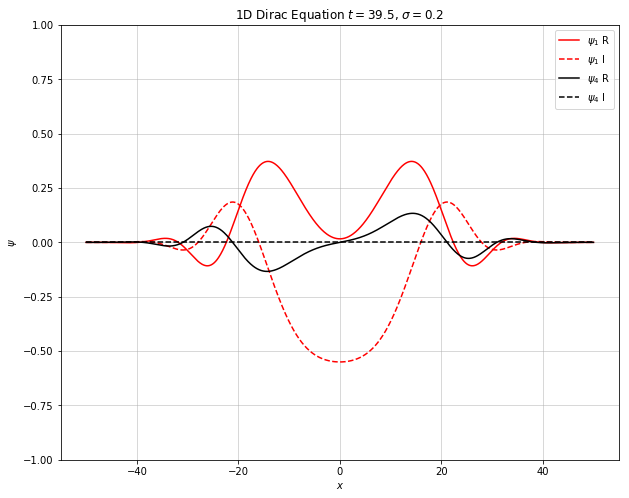

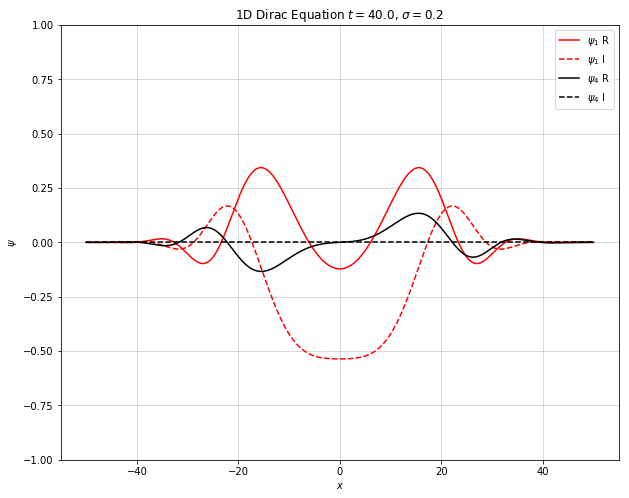

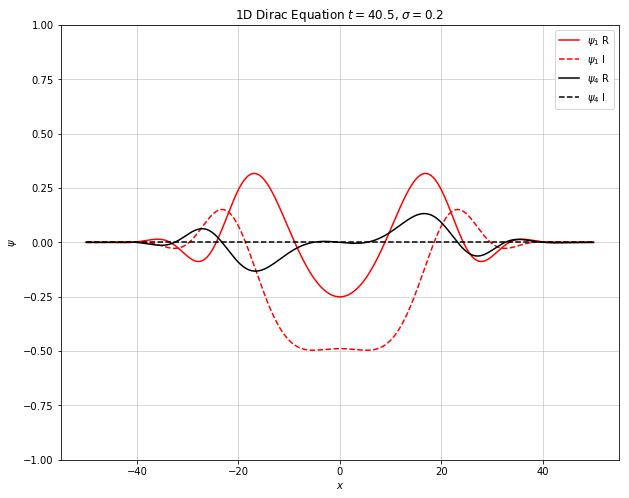

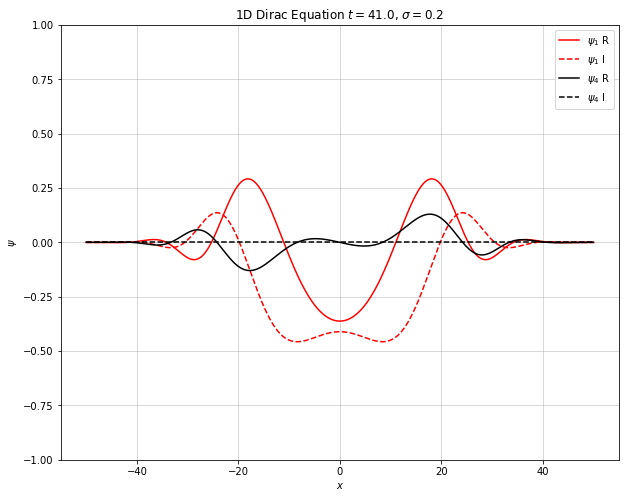

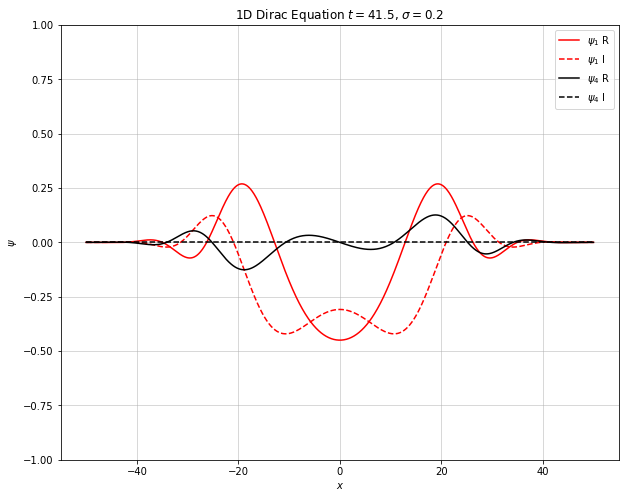

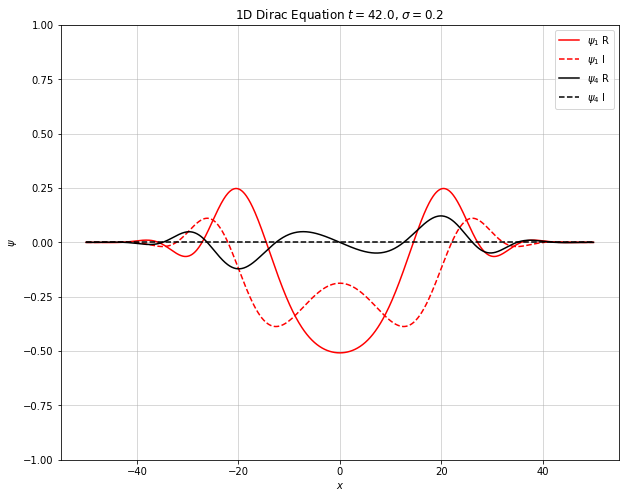

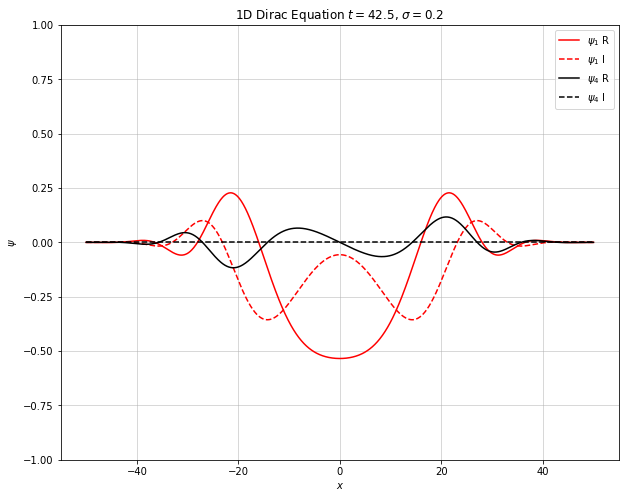

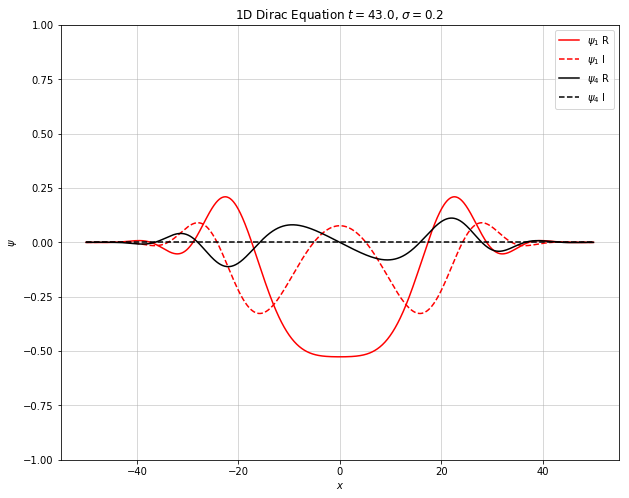

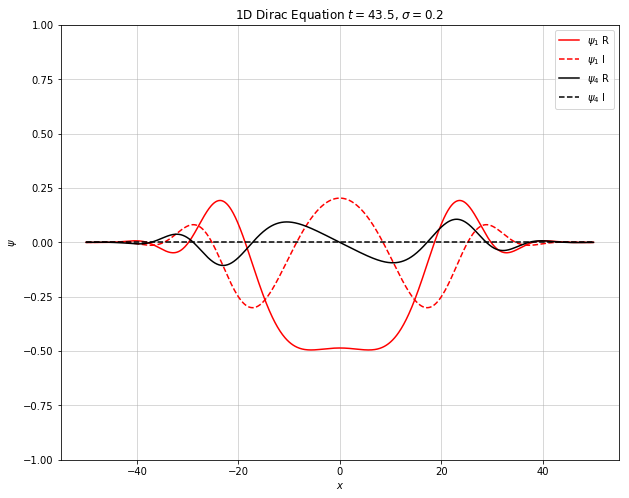

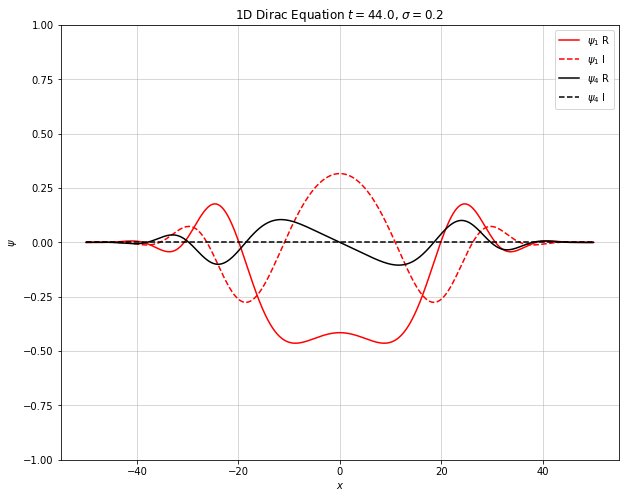

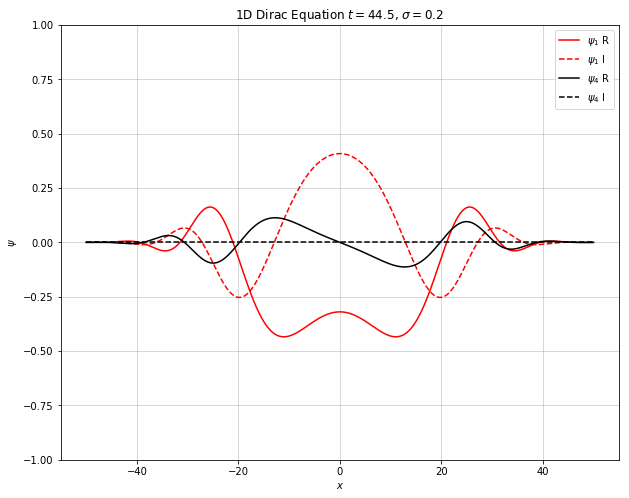

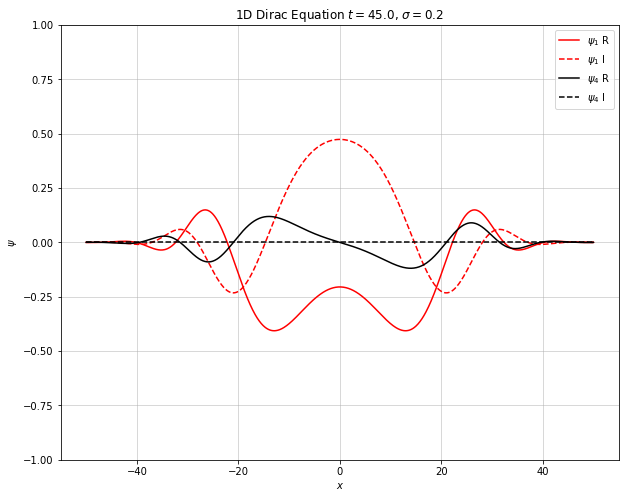

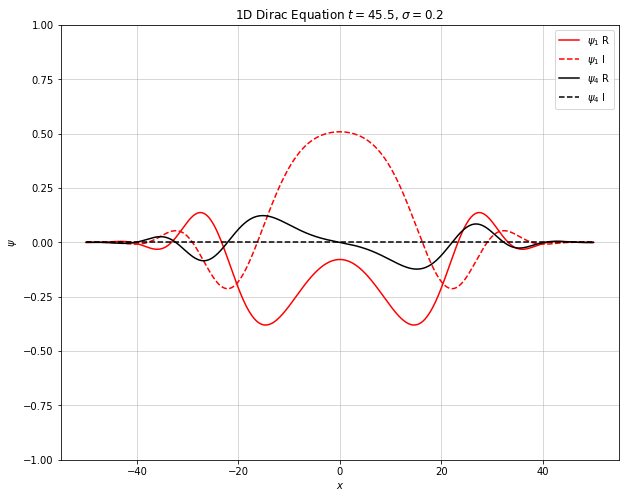

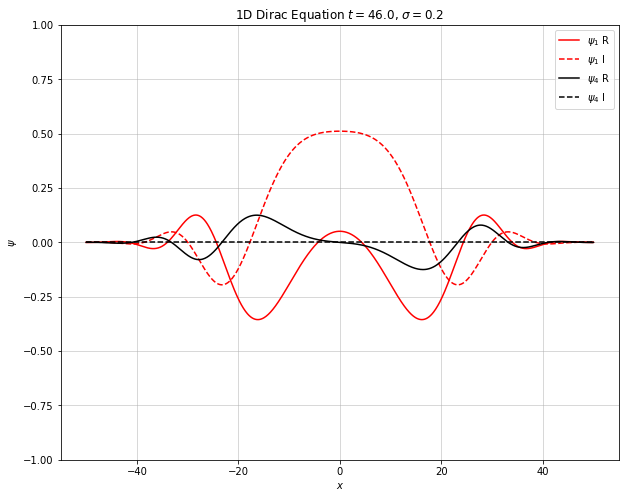

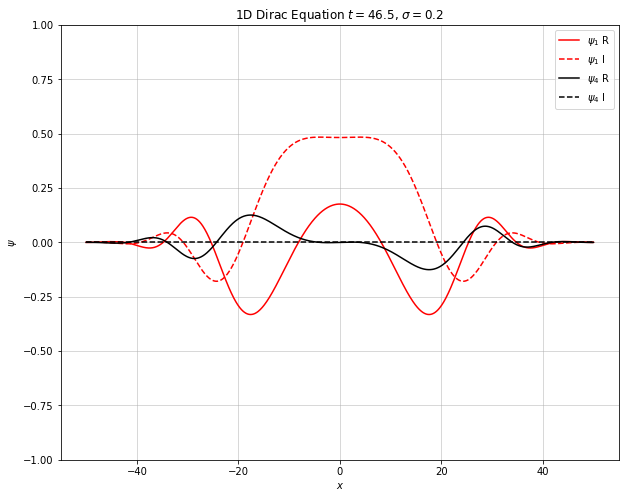

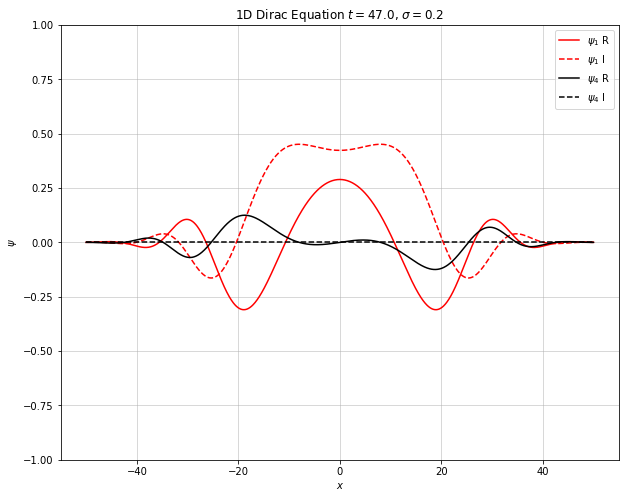

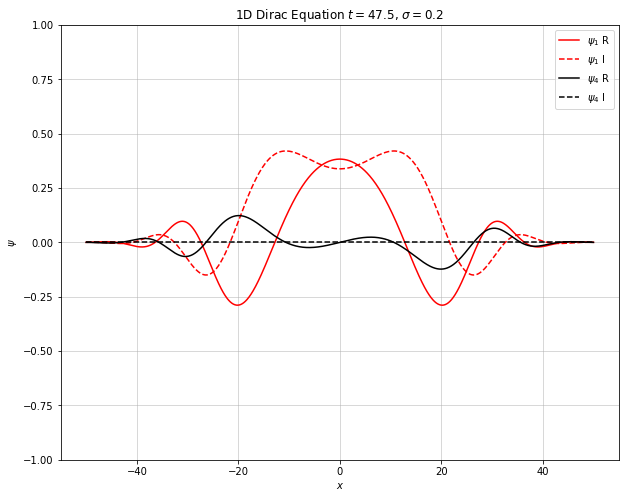

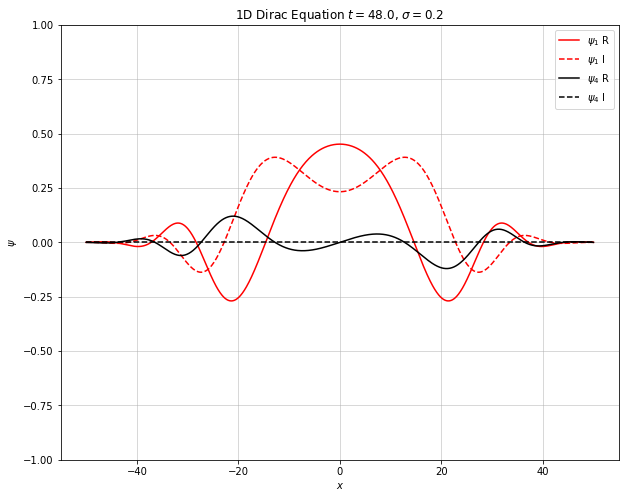

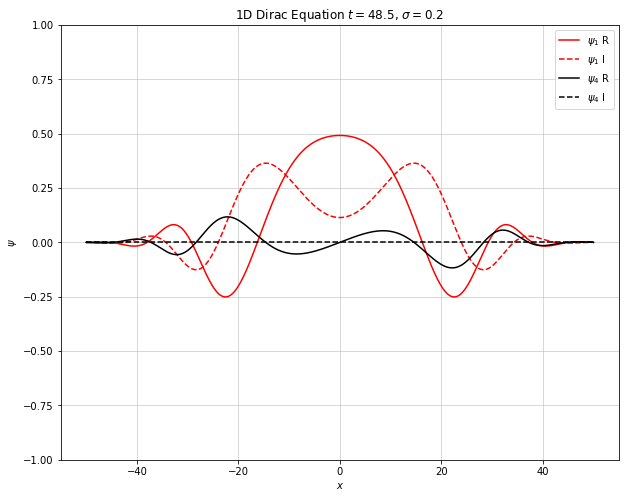

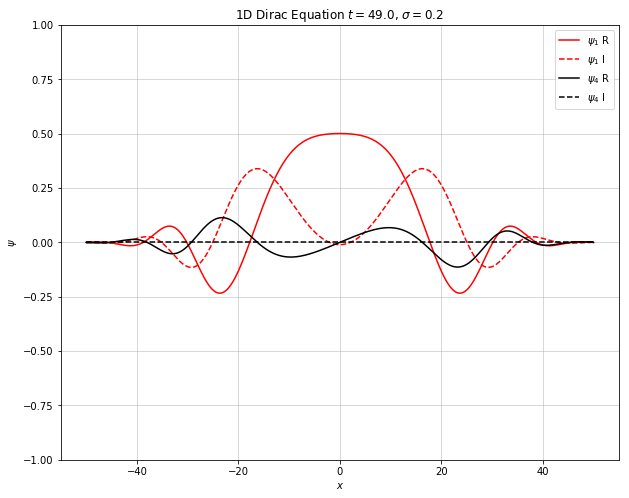

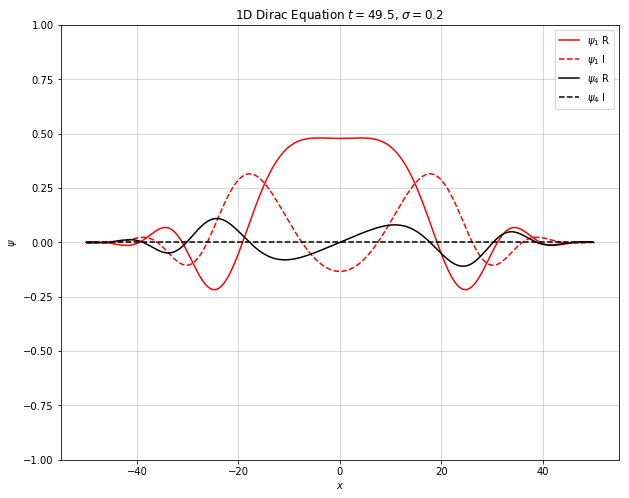

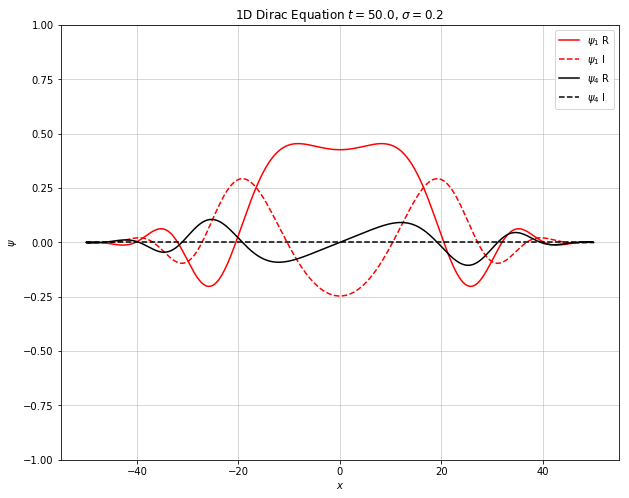

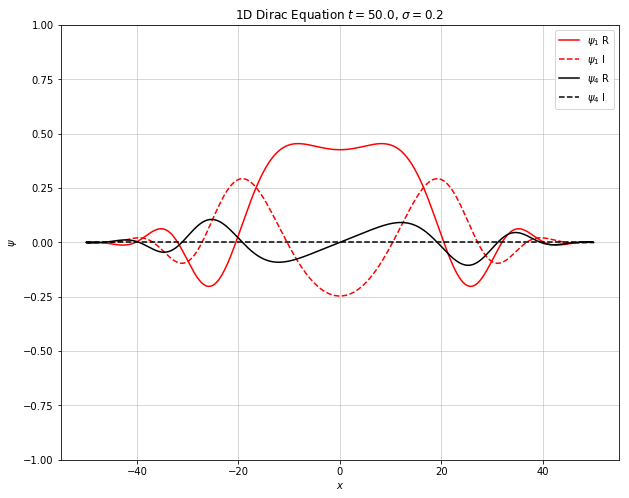

In [5]:
count = 0
ymax = 1
for zz in range(len(u[:,0])):
    if zz%int(0.2*len(u[0,:])) == 0:
        plt.figure(figsize=(10,8))
        plt.plot(x, u[zz,:].real, 'r', label=r'$\psi_1$ R')
        plt.plot(x, u[zz,:].imag, 'r--', label=r'$\psi_1$ I')
        plt.plot(x, v[zz,:].real, 'k', label=r'$\psi_4$ R')
        plt.plot(x, v[zz,:].imag, 'k--', label=r'$\psi_4$ I')
        plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[zz], 4), sigma))
        plt.ylabel(r'$\psi$')
        plt.xlabel(r'$x$')
        plt.grid(alpha=0.618)
        plt.ylim(-ymax,ymax)
        plt.legend()
        if count < 10:
            plt.savefig('A00{}'.format(count)+'.png')
        elif 10 <= count < 100:
            plt.savefig('A0{}'.format(count)+'.png')
        elif 100 <= count < 1000:
            plt.savefig('A{}'.format(count)+'.png')
        plt.show()
#         plt.close()
        count += 1

plt.figure(figsize=(10,8))
plt.plot(x, u[-1,:].real, 'r', label=r'$\psi_1$ R')
plt.plot(x, u[-1,:].imag, 'r--', label=r'$\psi_1$ I')
plt.plot(x, v[-1,:].real, 'k', label=r'$\psi_4$ R')
plt.plot(x, v[-1,:].imag, 'k--', label=r'$\psi_4$ I')
plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[zz], 4), sigma))
plt.ylabel(r'$\psi$')
plt.xlabel(r'$x$')
plt.grid(alpha=0.618)
plt.legend()
plt.ylim(-ymax,ymax)
plt.savefig('A{}'.format(count) + '.png')
plt.show()
# plt.close()

C:\Users\Algrus\AppData\Roaming\Python\Python36\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


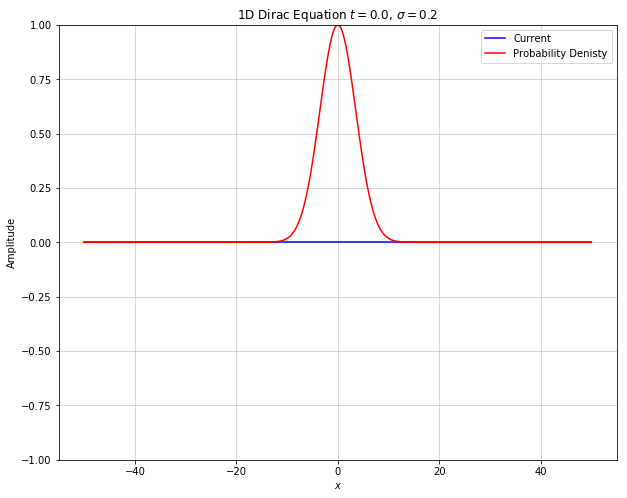

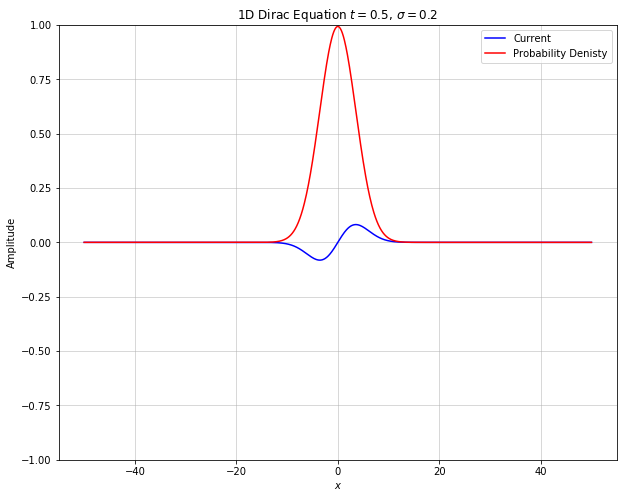

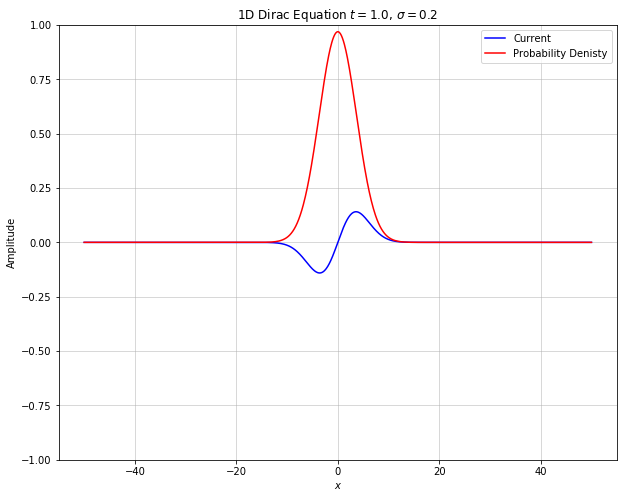

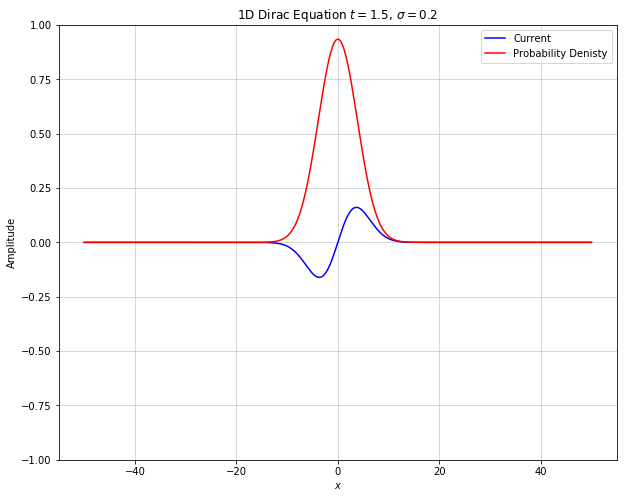

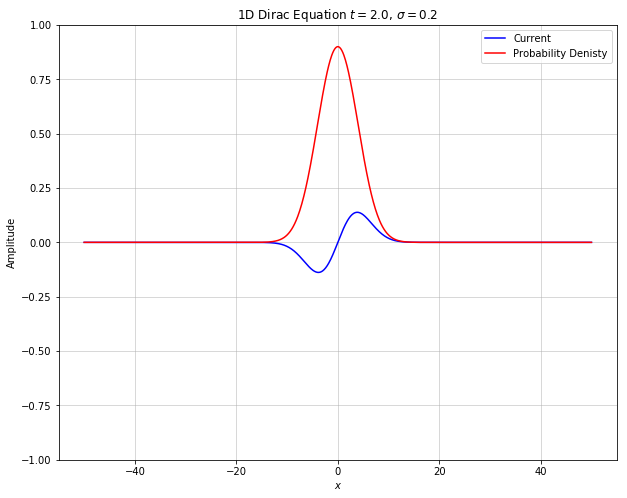

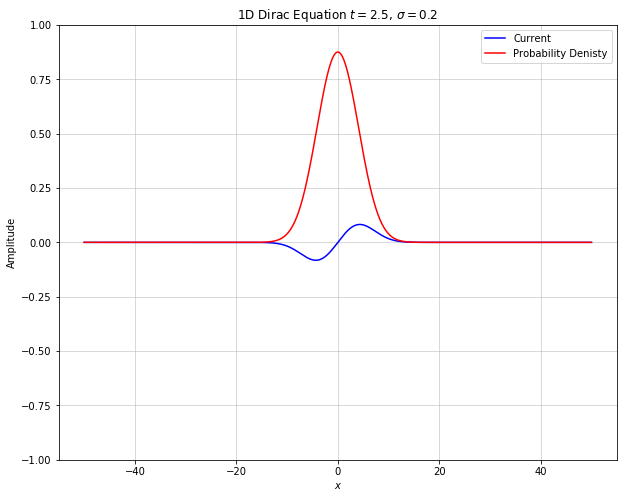

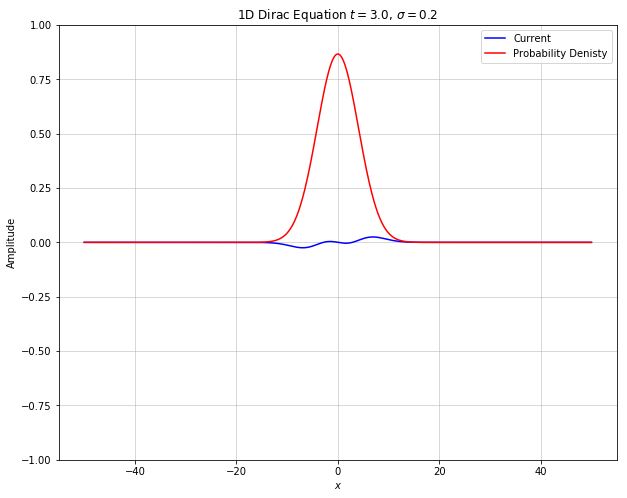

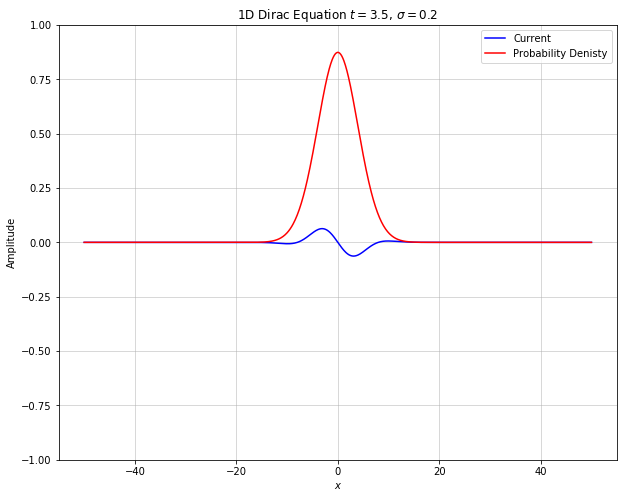

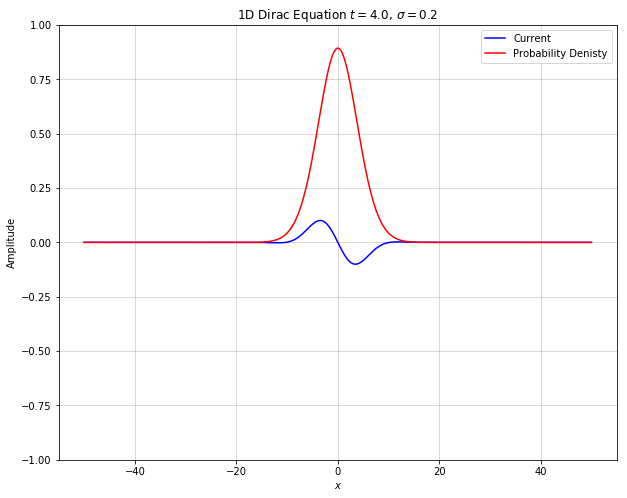

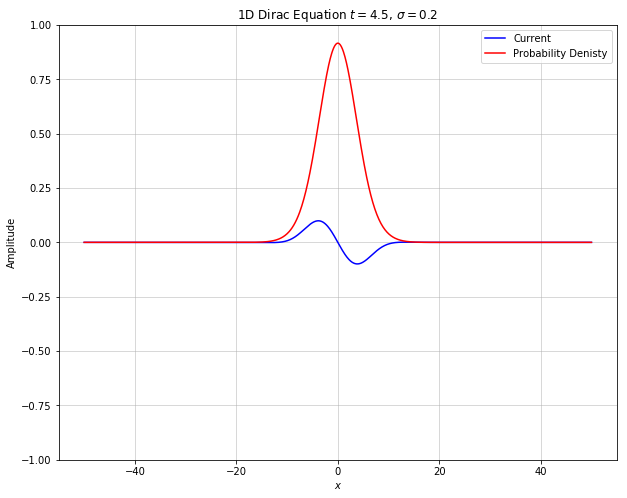

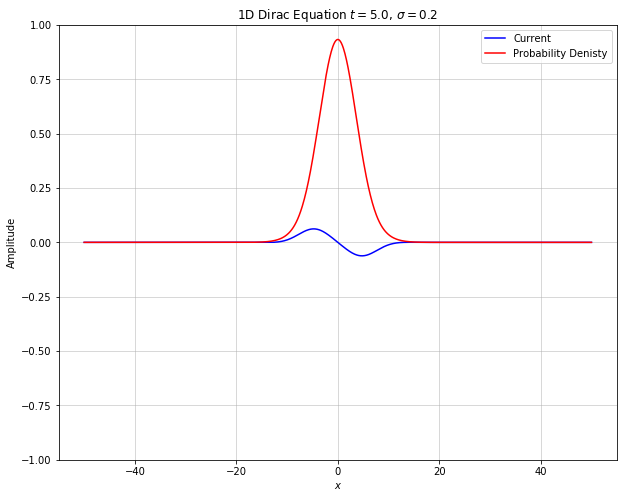

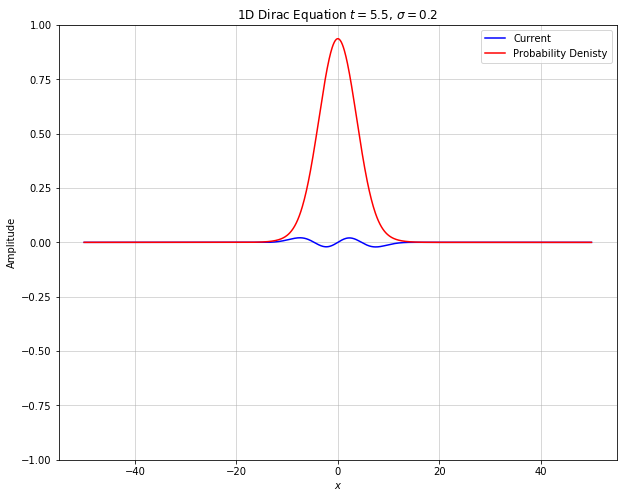

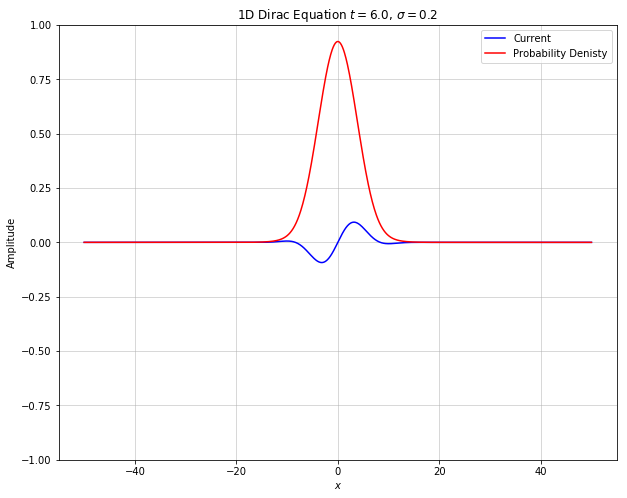

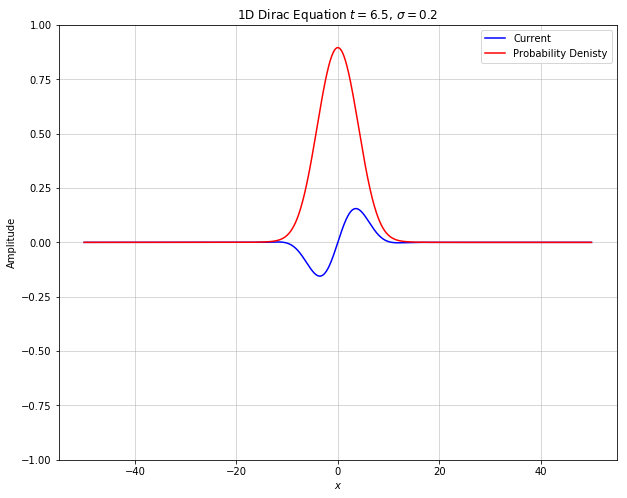

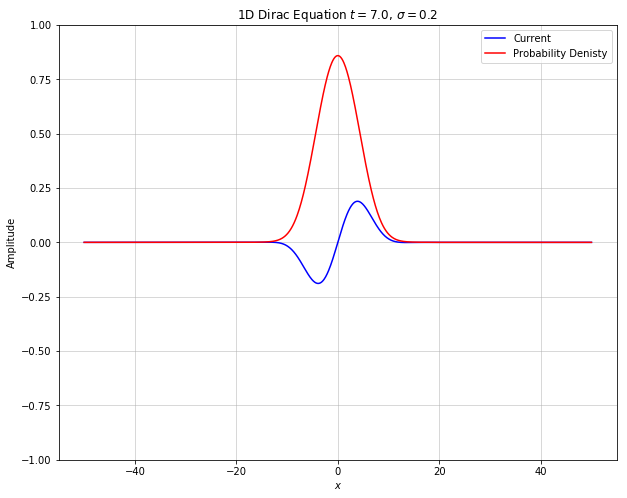

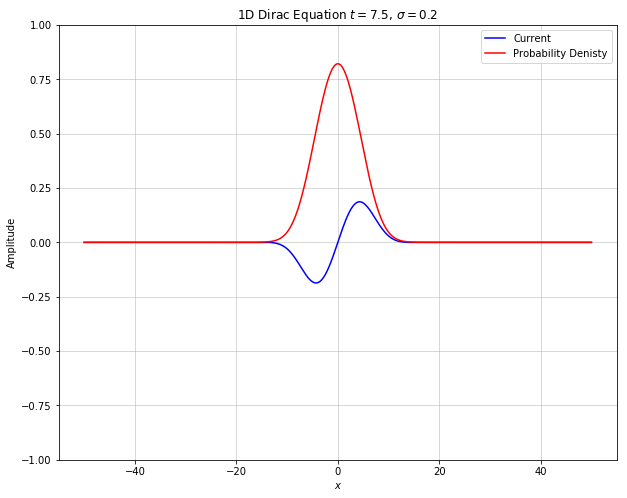

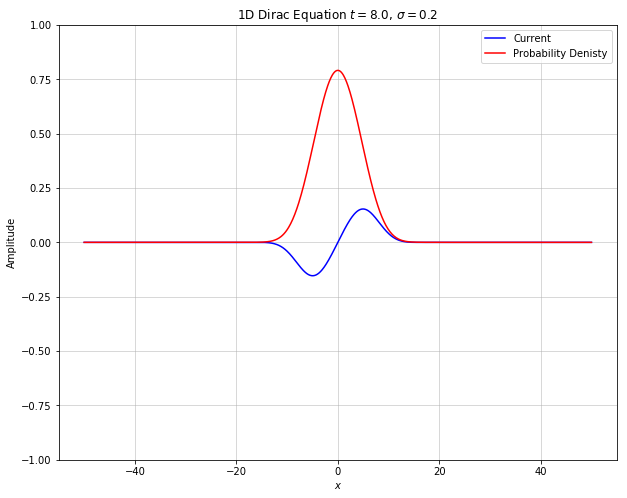

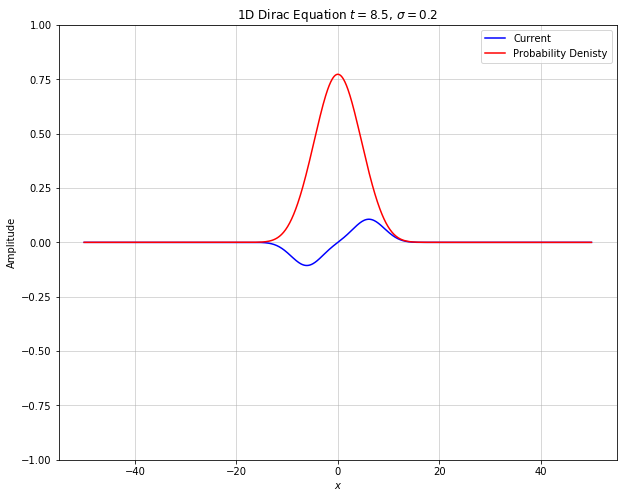

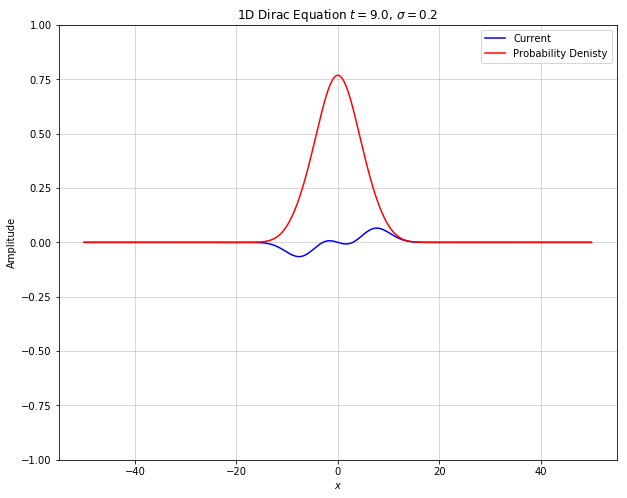

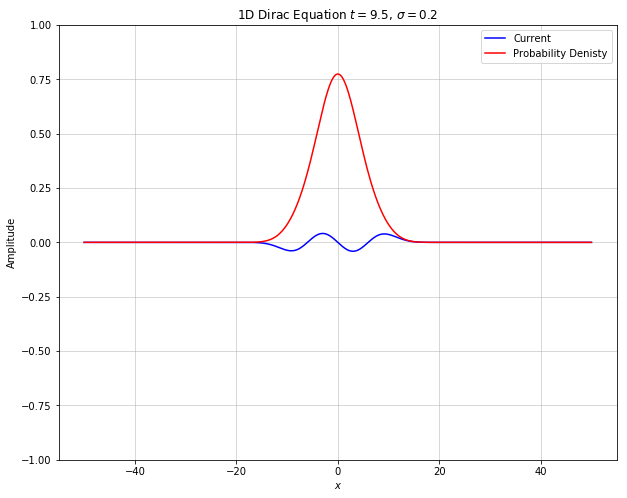

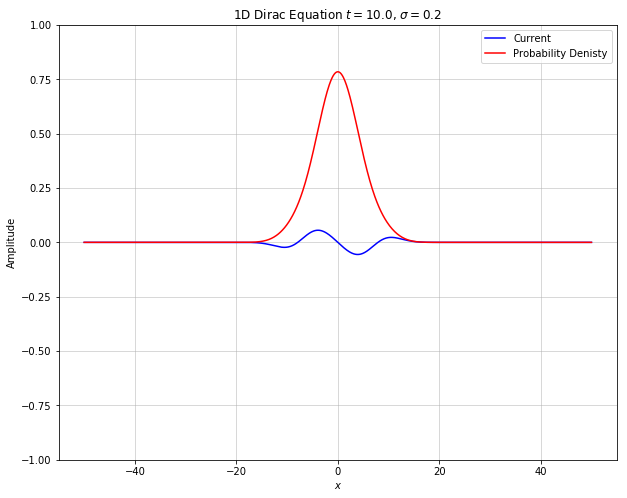

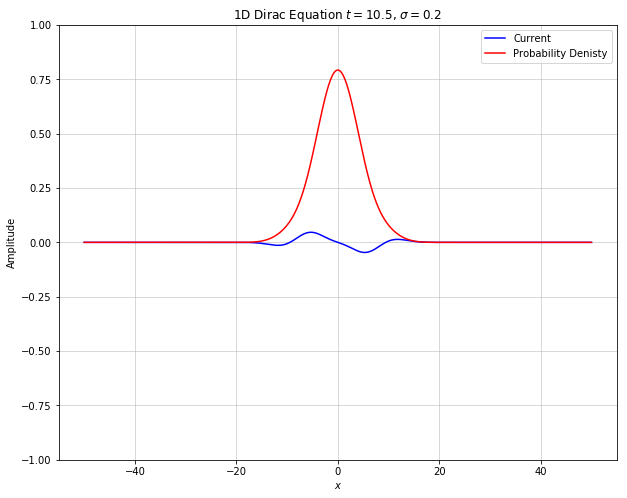

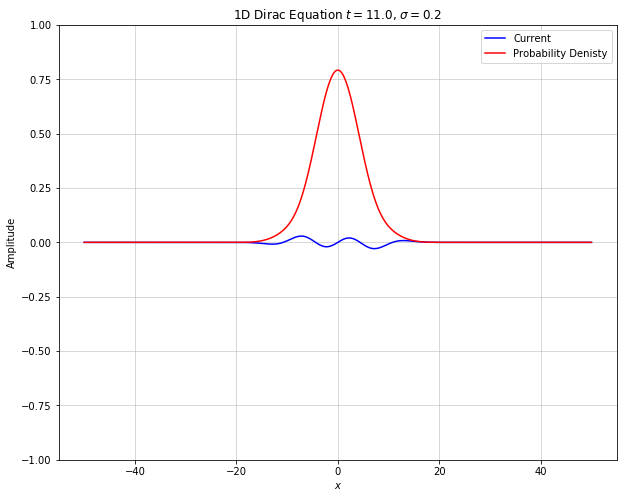

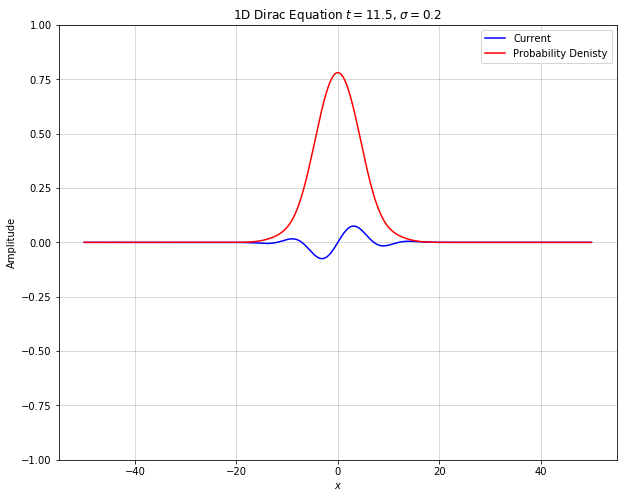

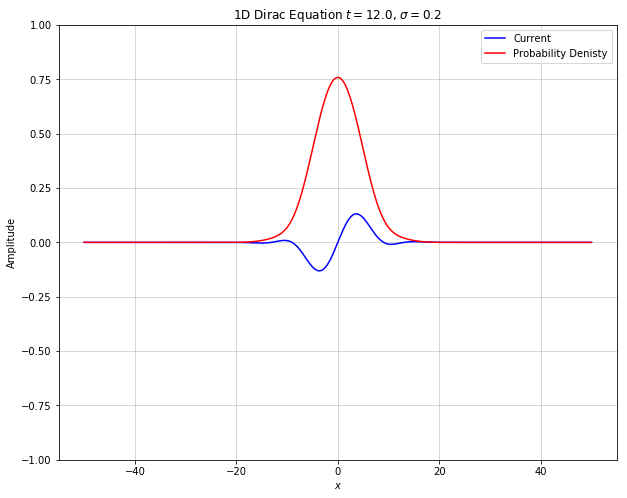

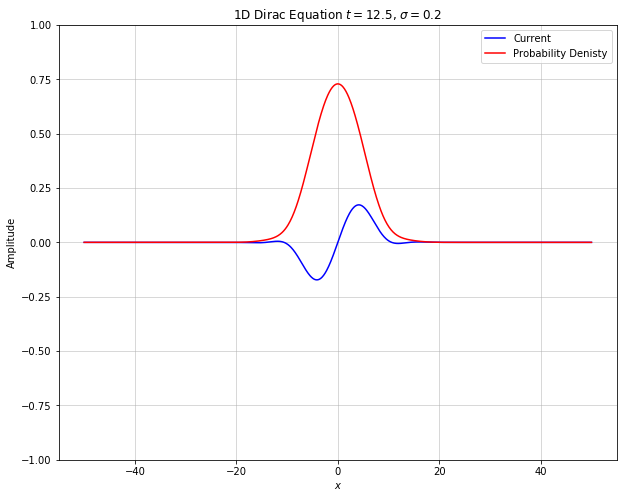

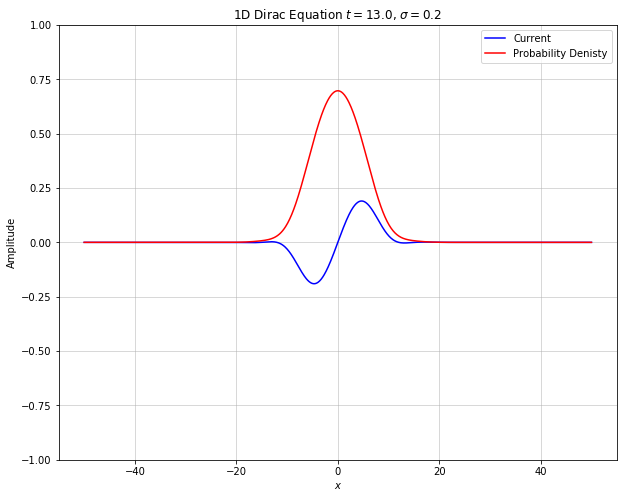

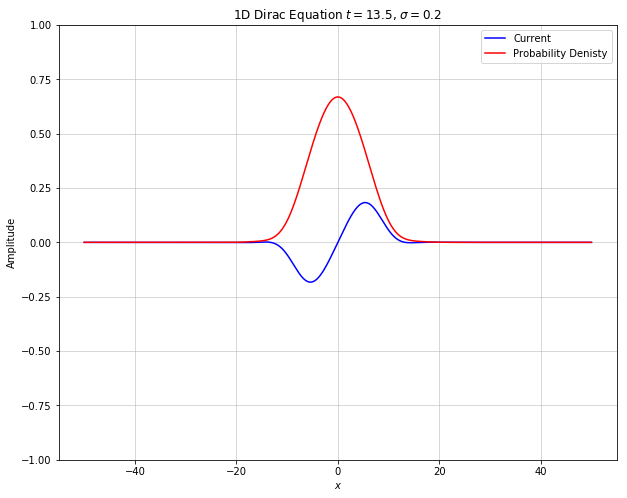

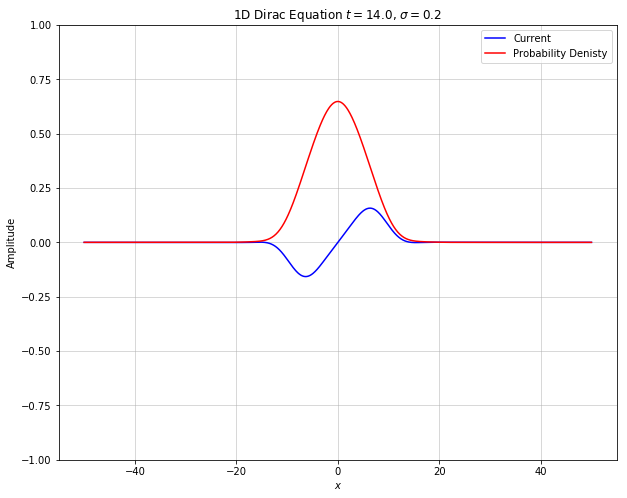

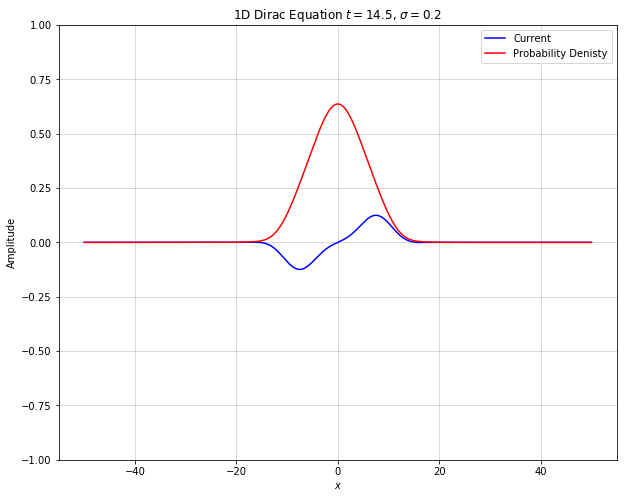

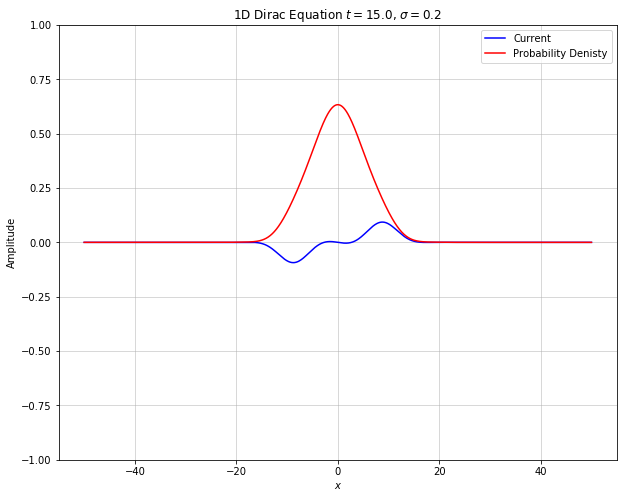

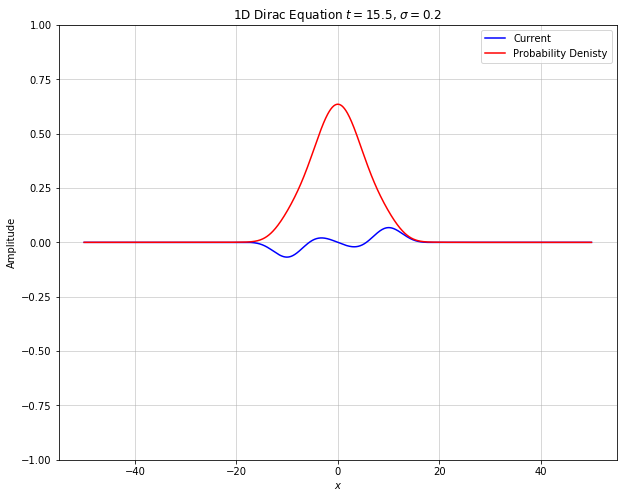

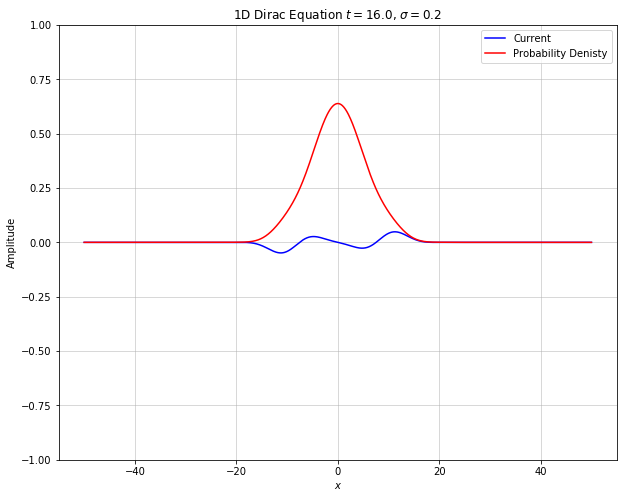

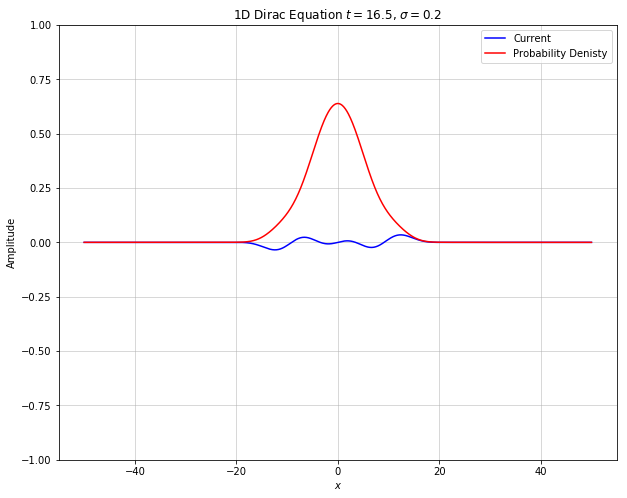

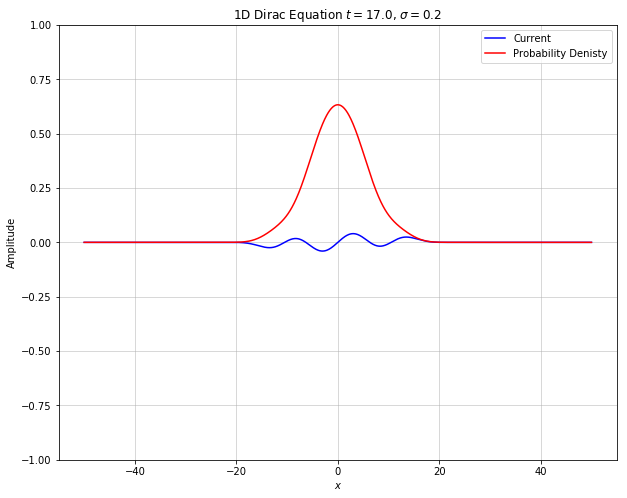

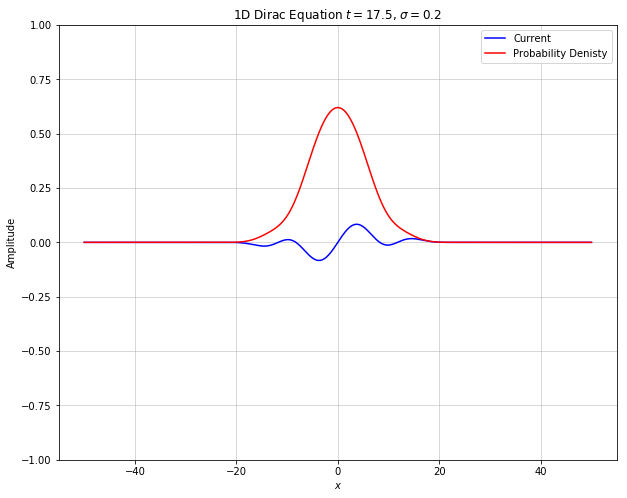

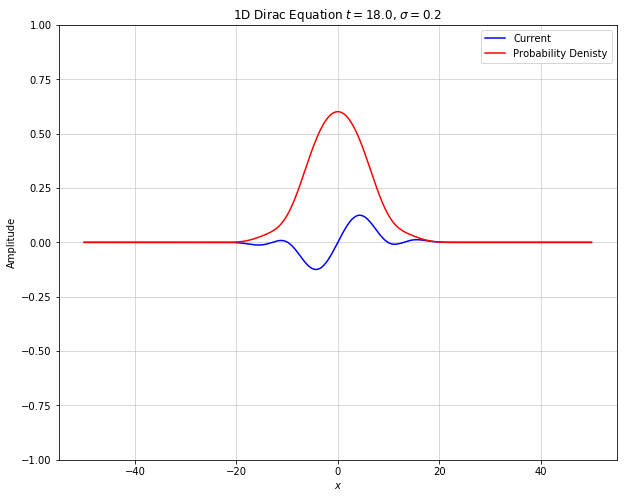

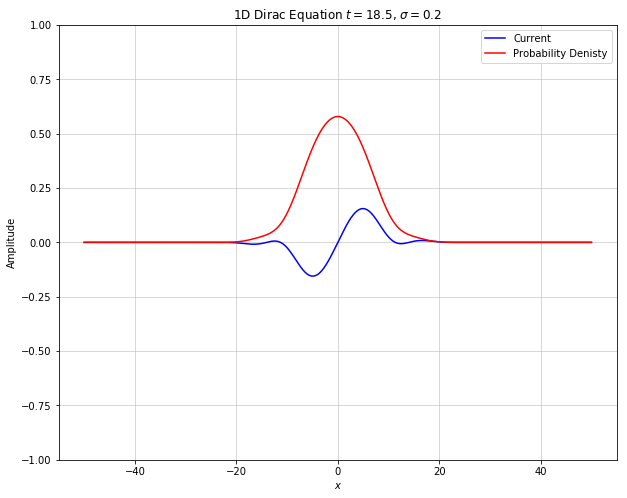

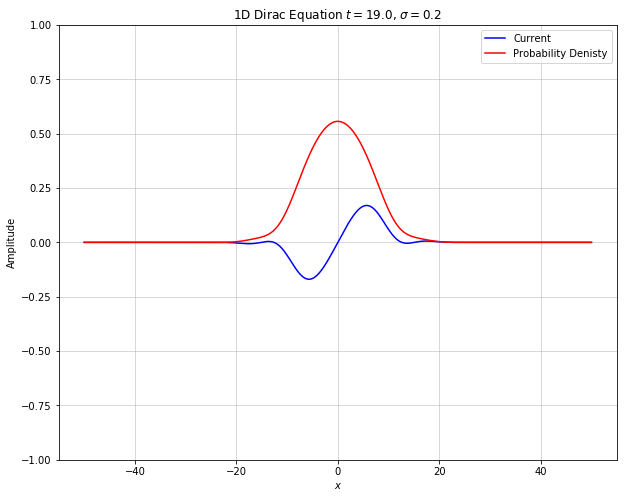

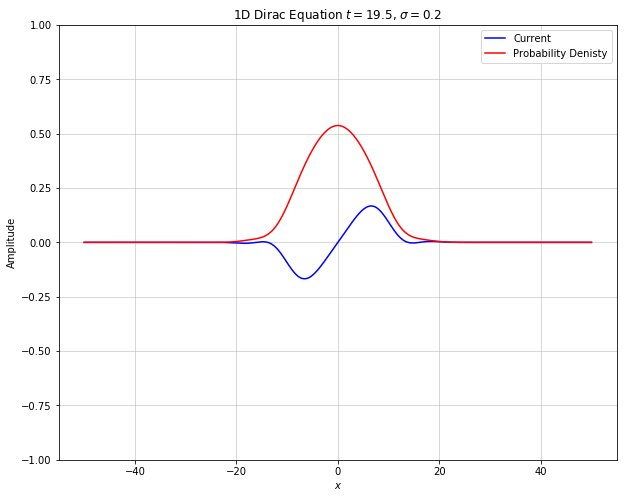

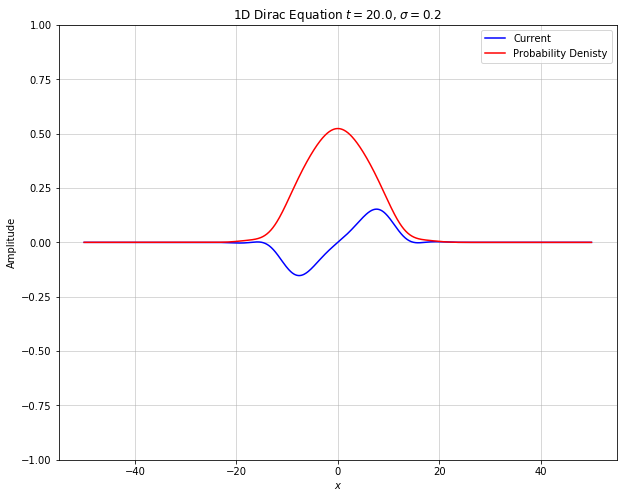

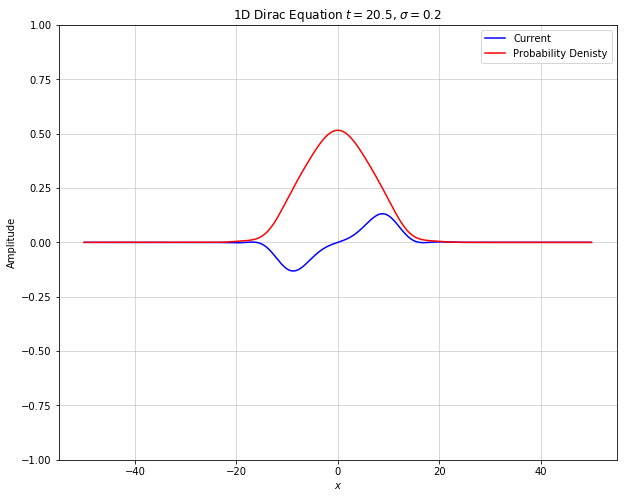

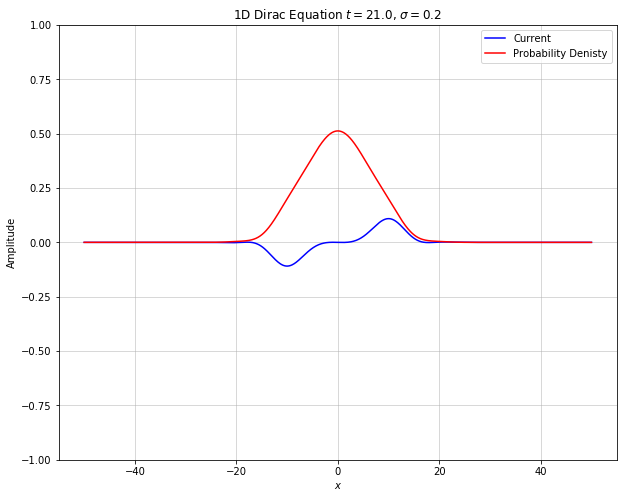

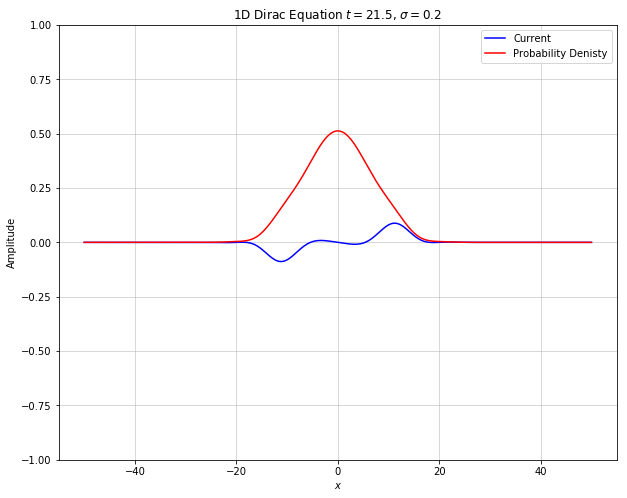

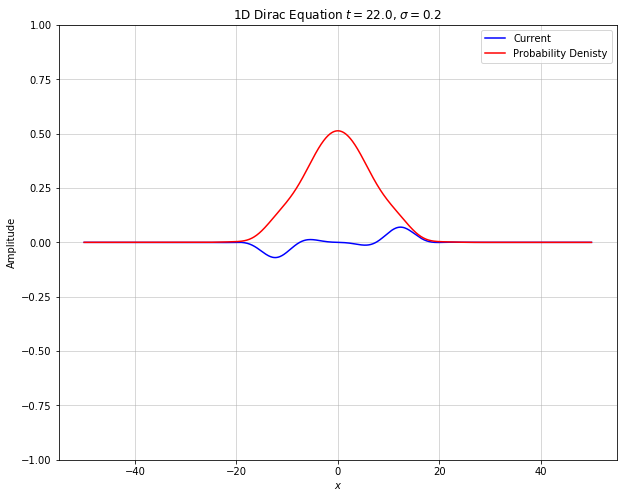

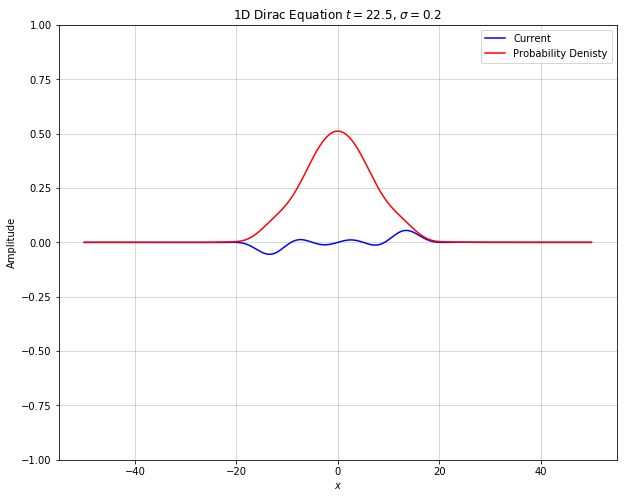

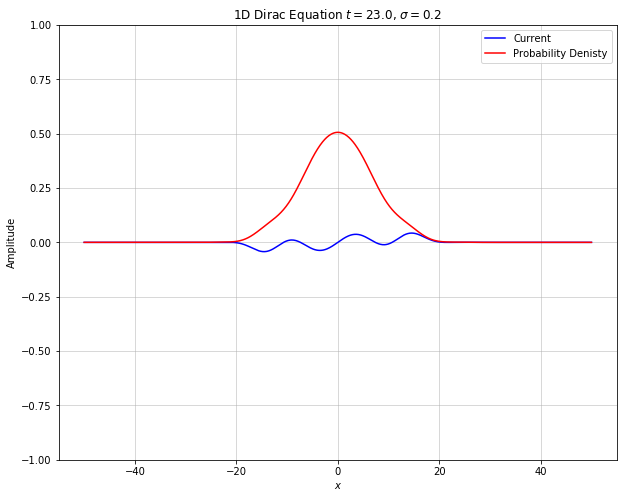

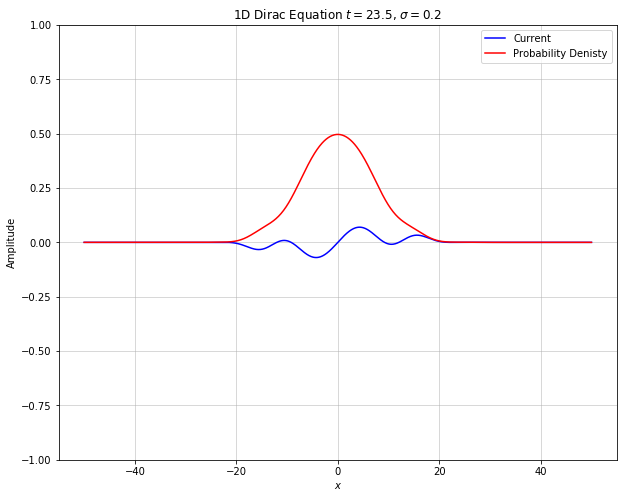

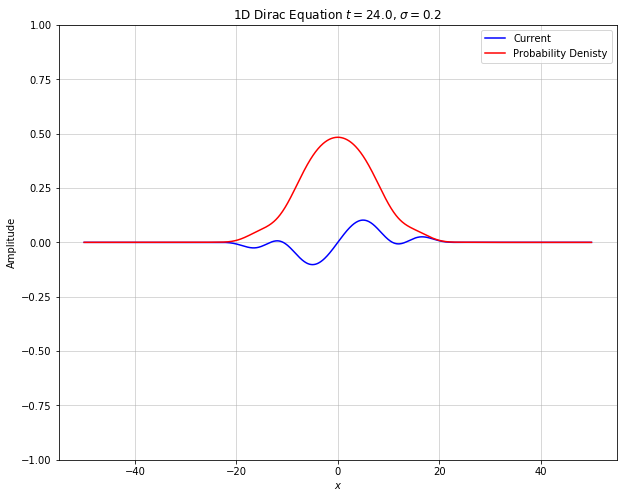

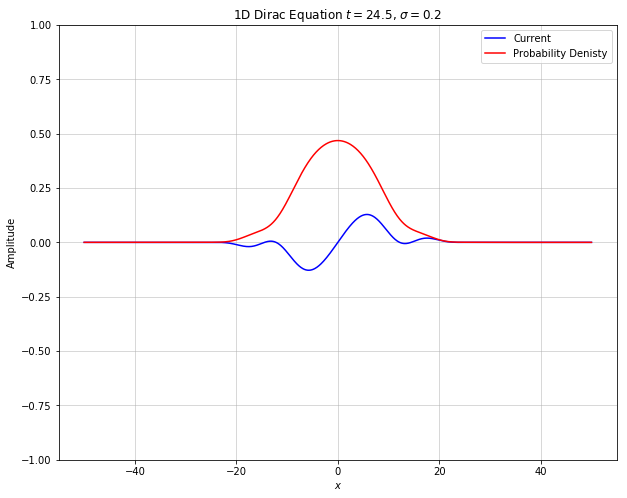

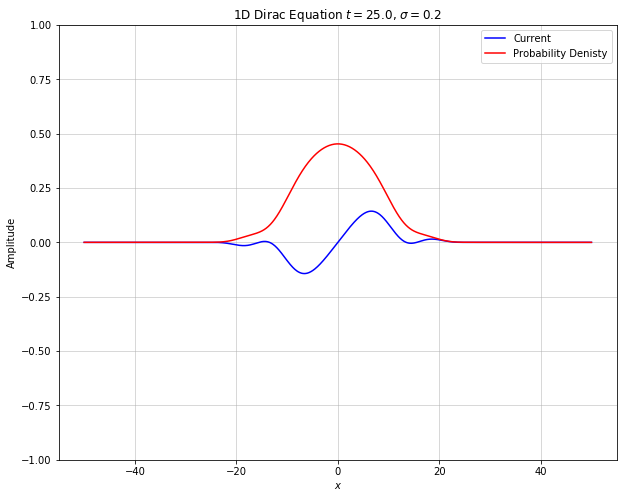

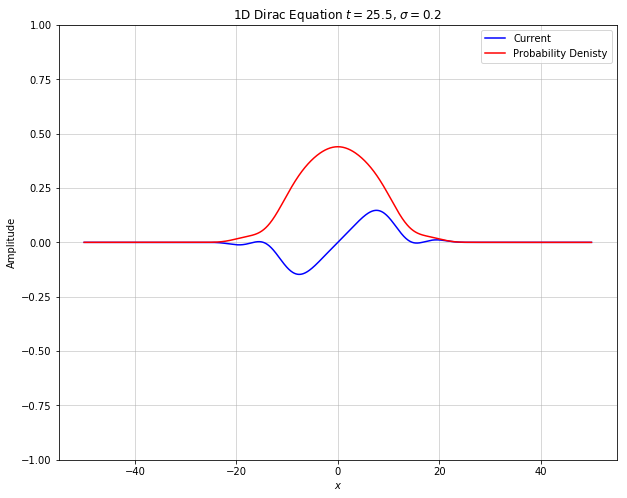

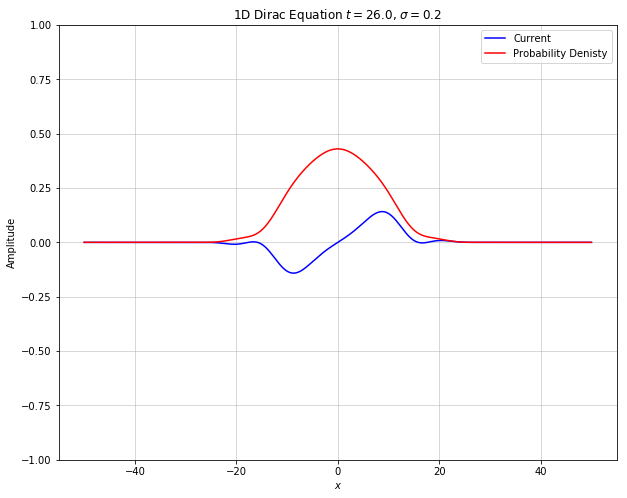

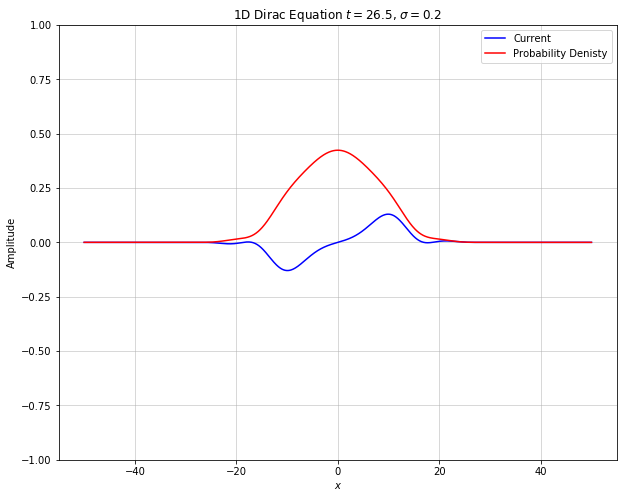

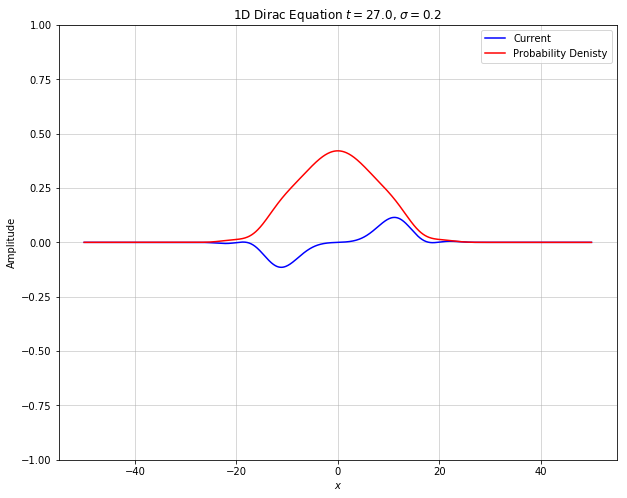

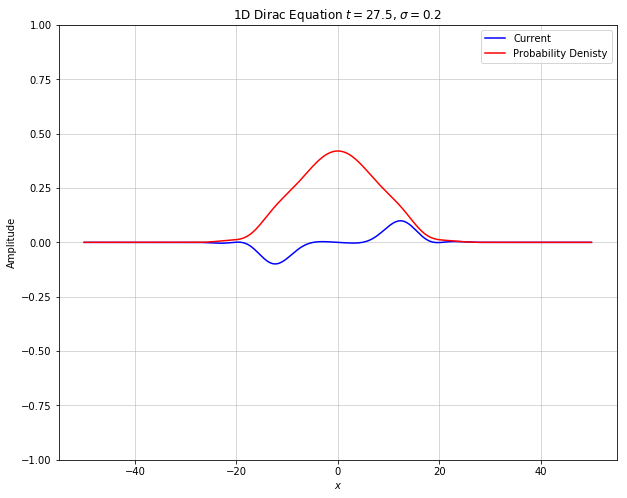

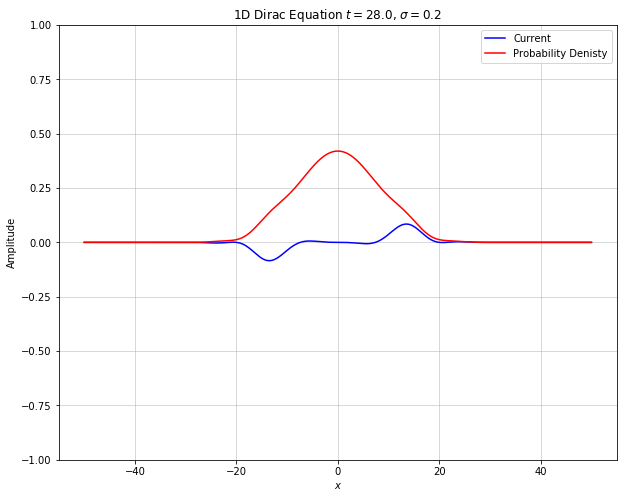

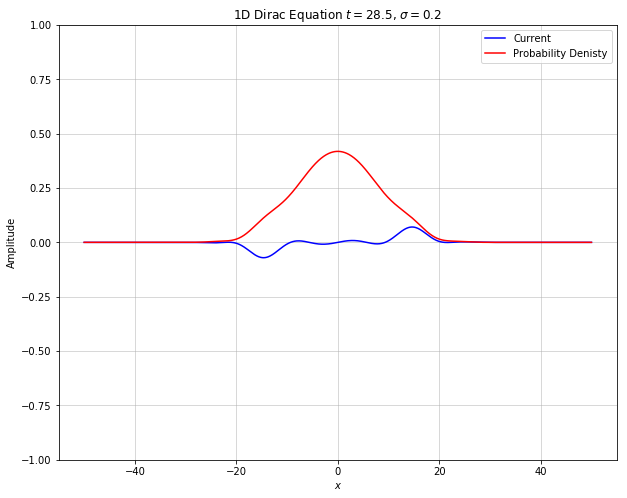

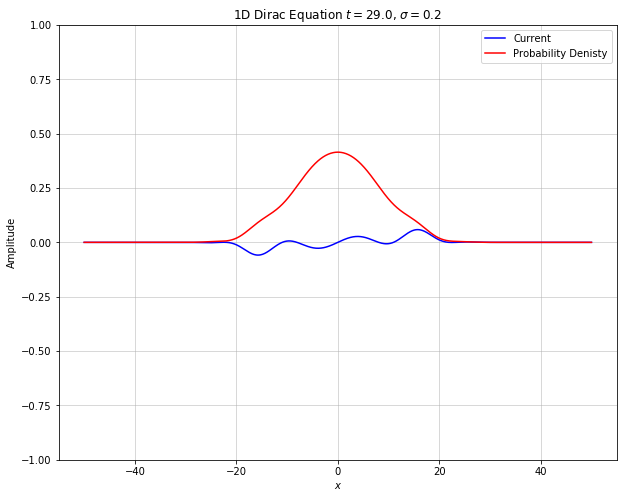

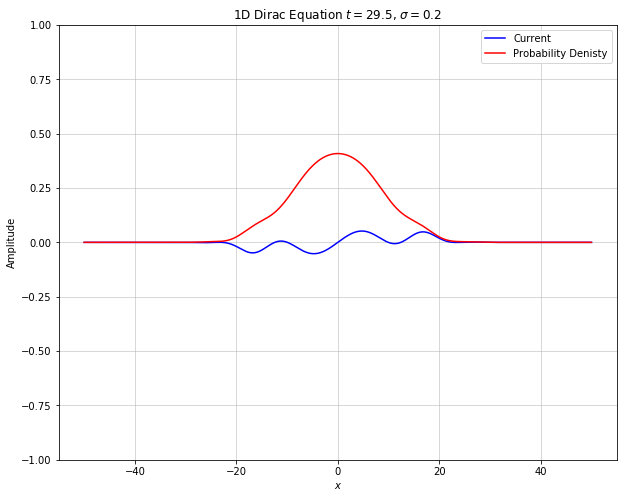

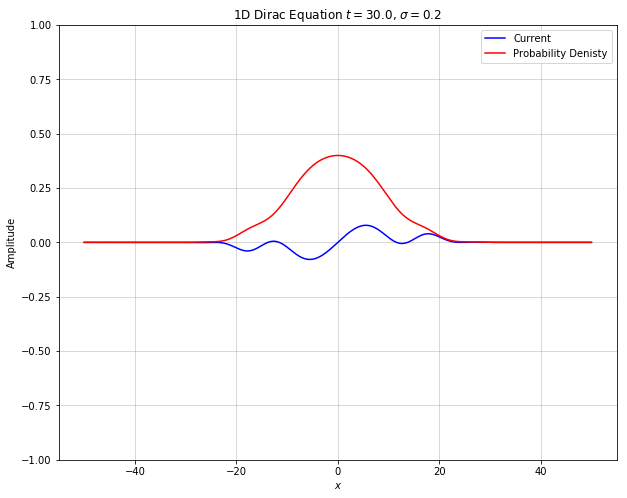

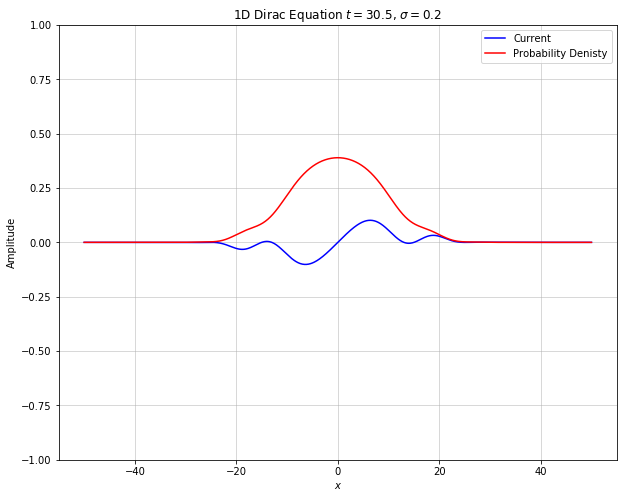

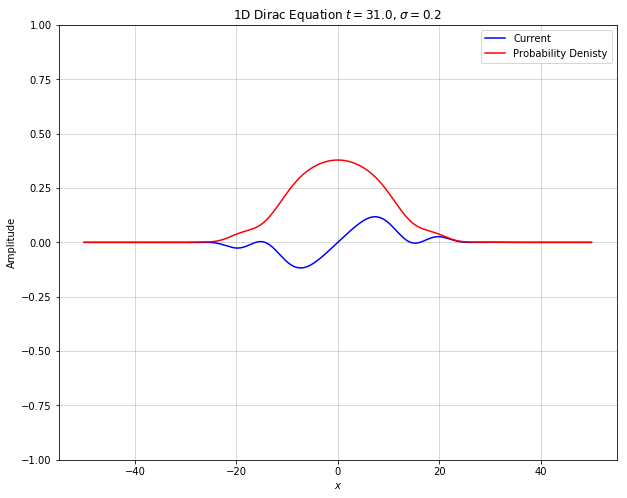

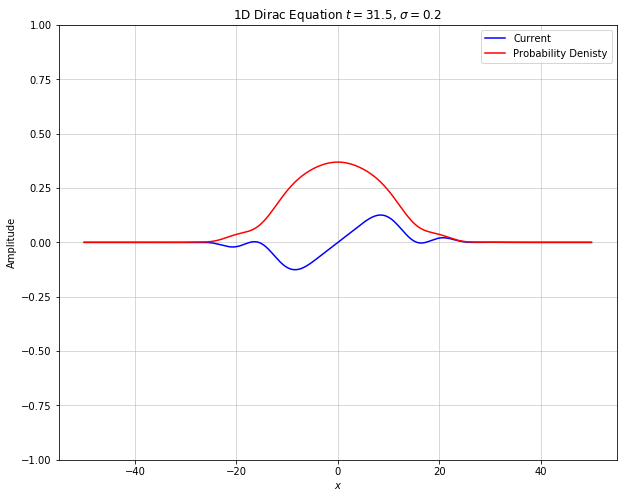

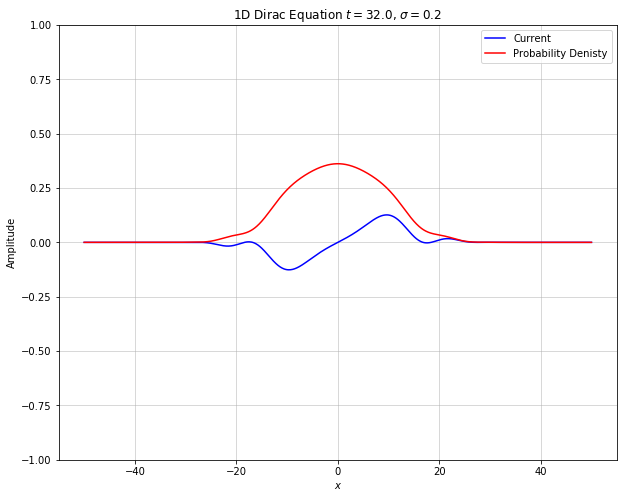

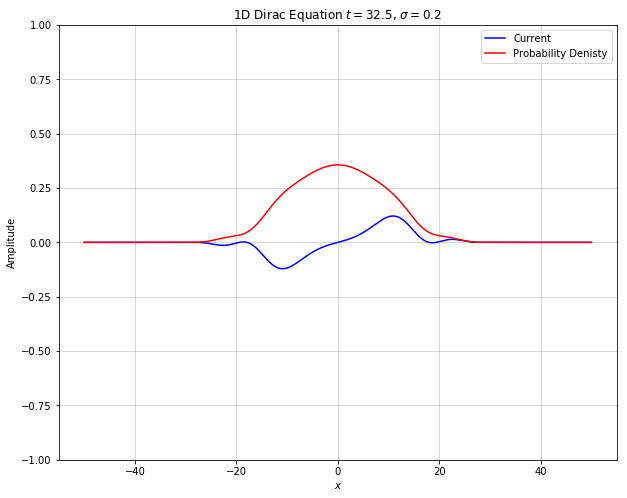

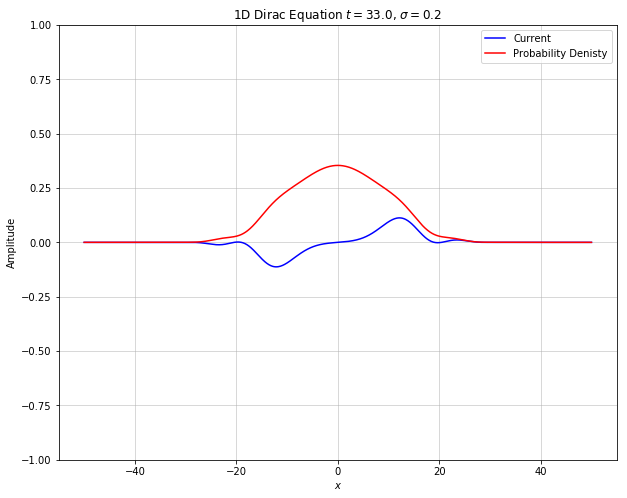

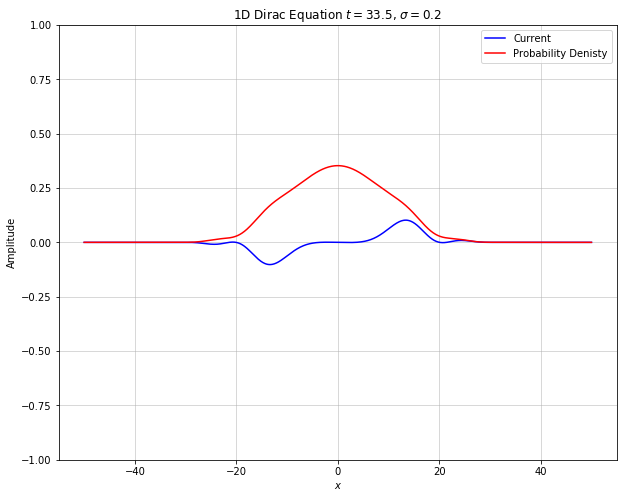

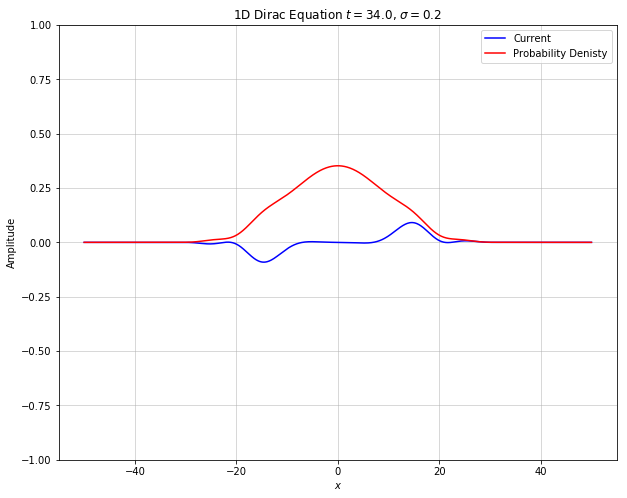

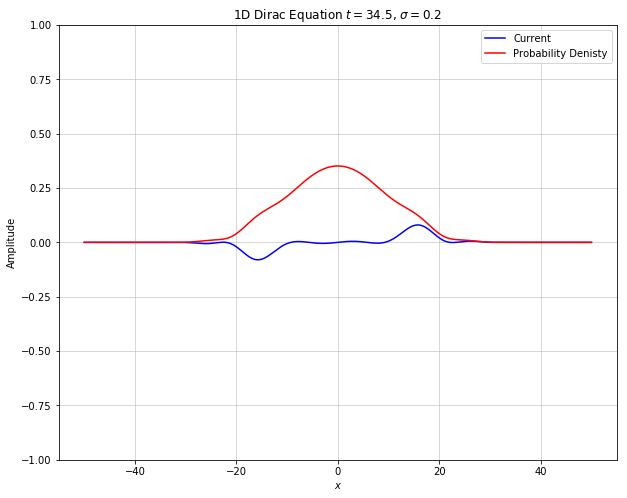

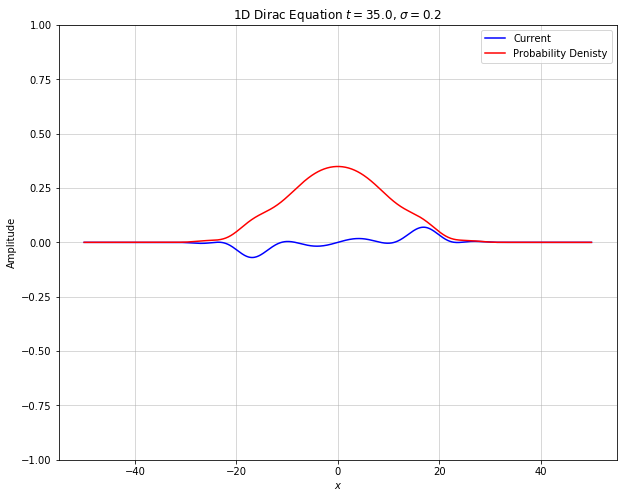

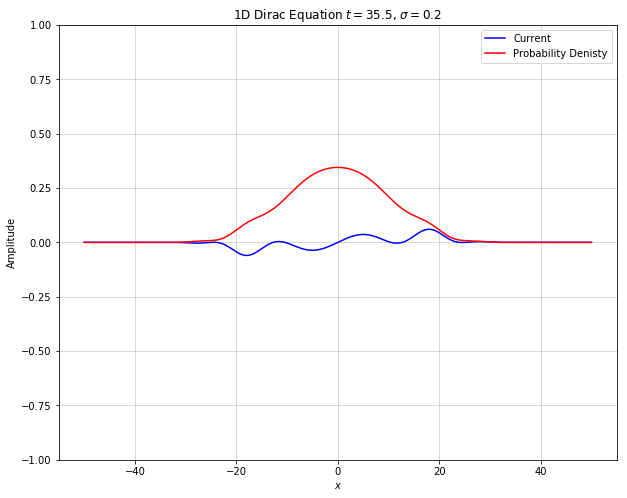

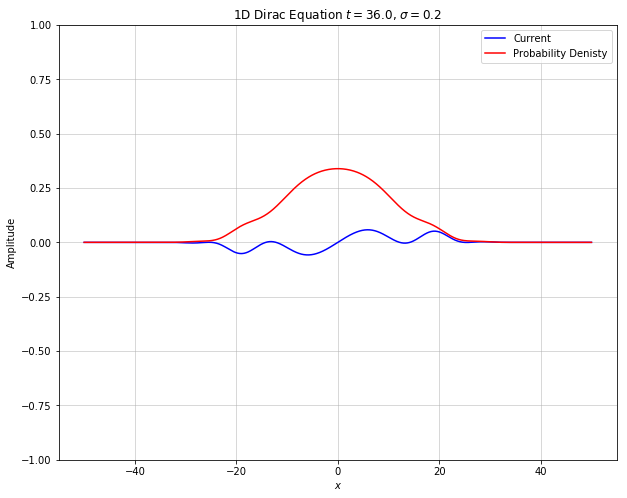

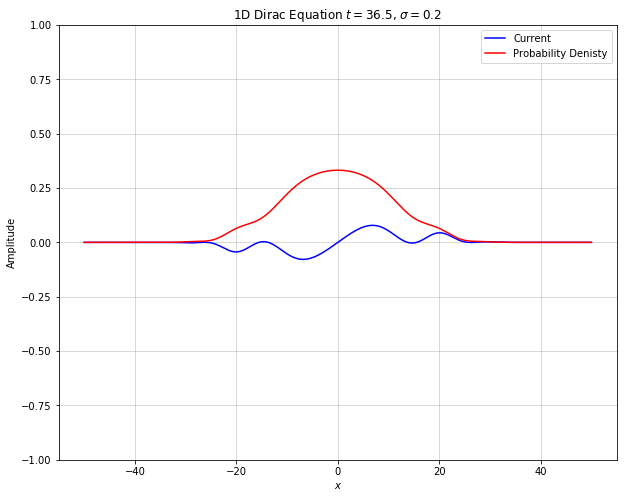

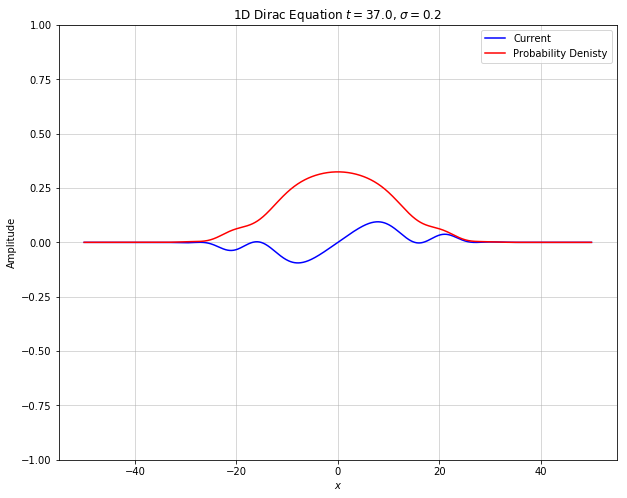

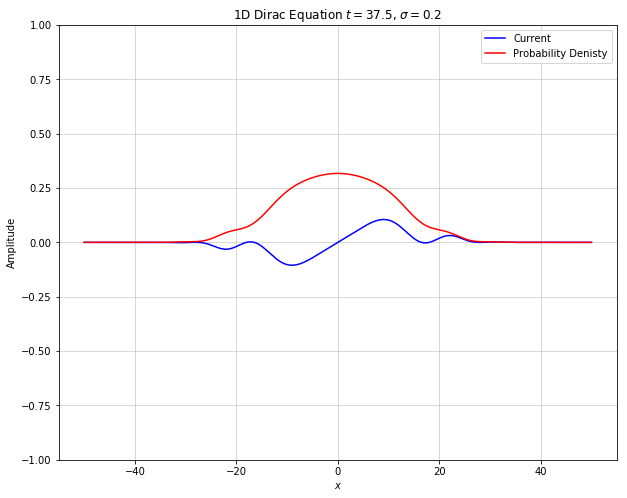

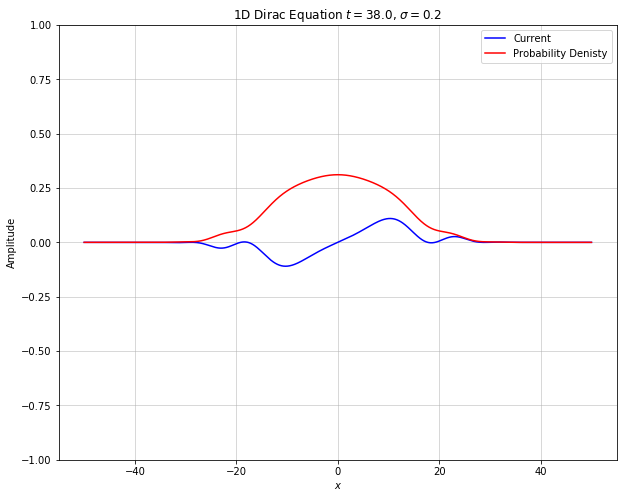

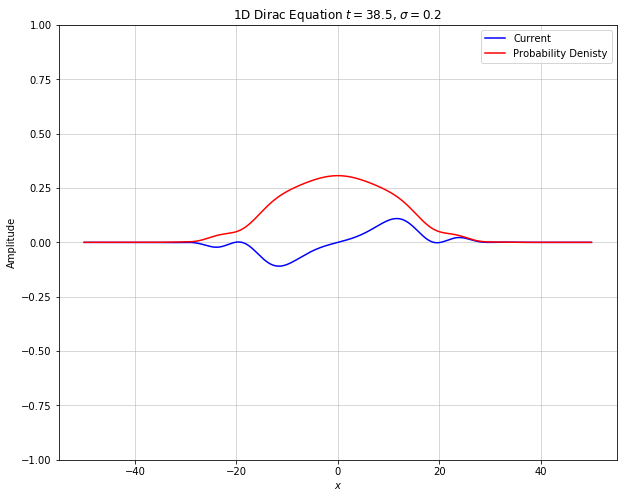

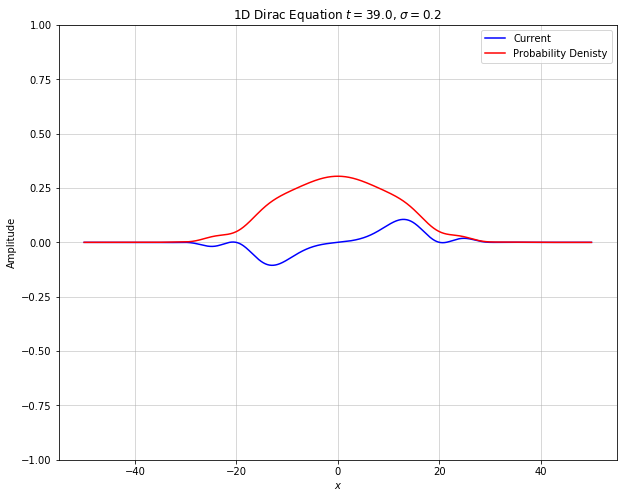

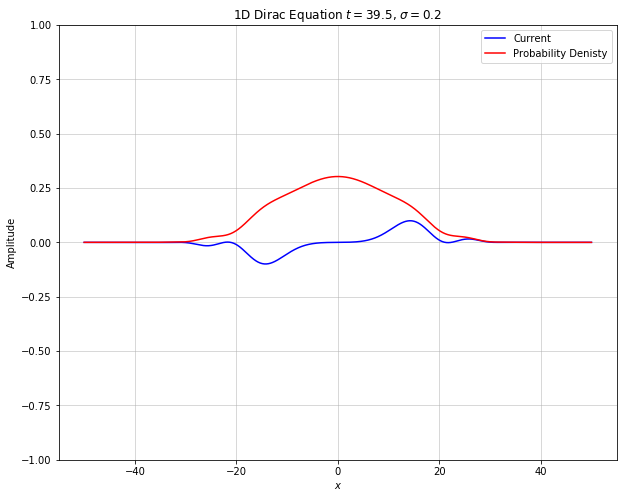

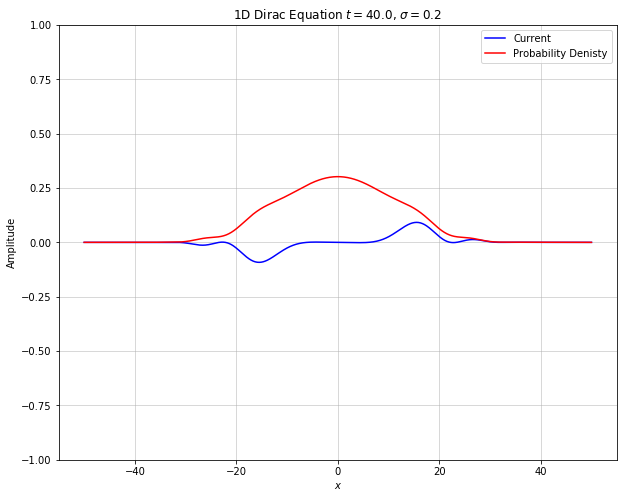

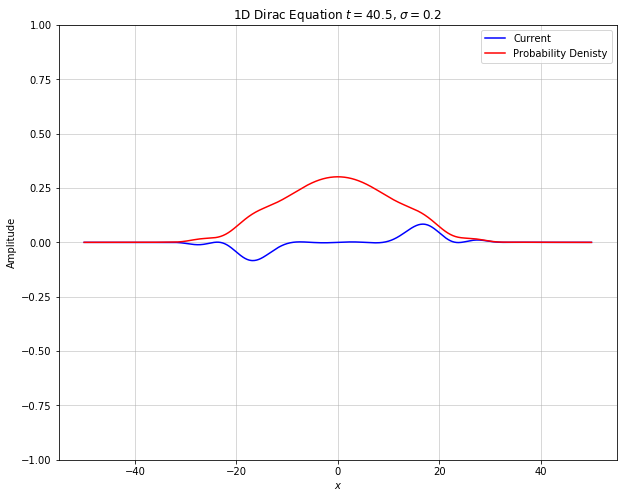

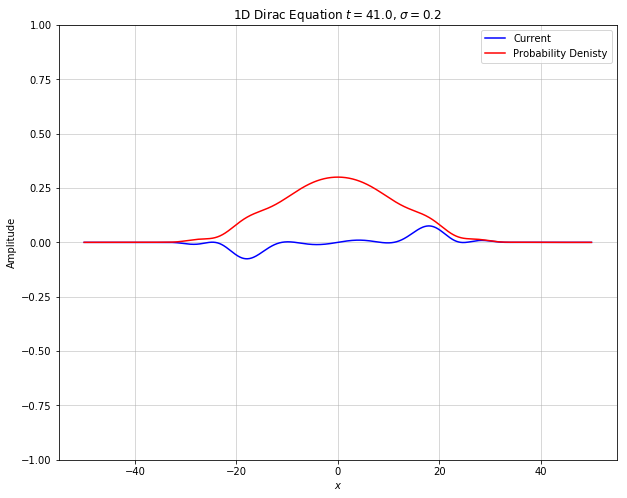

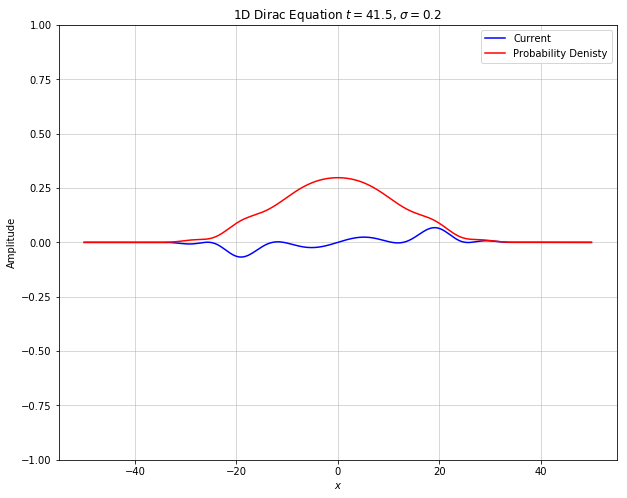

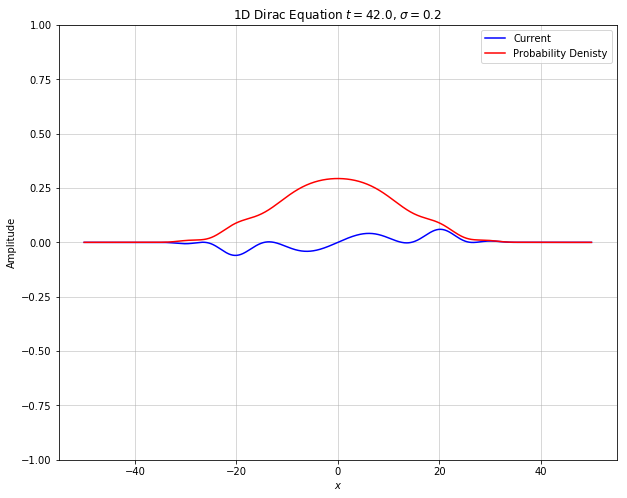

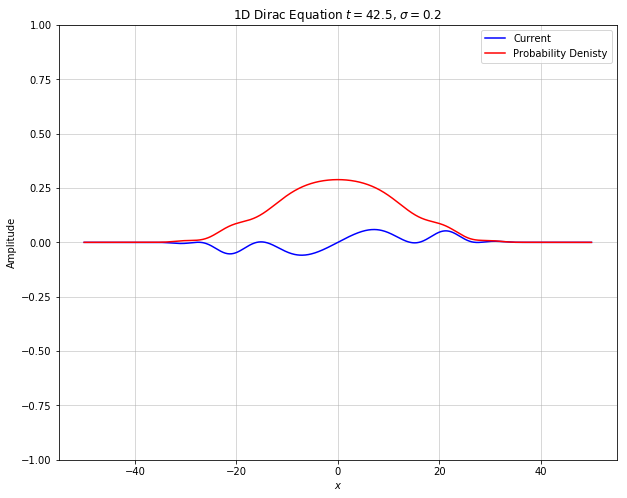

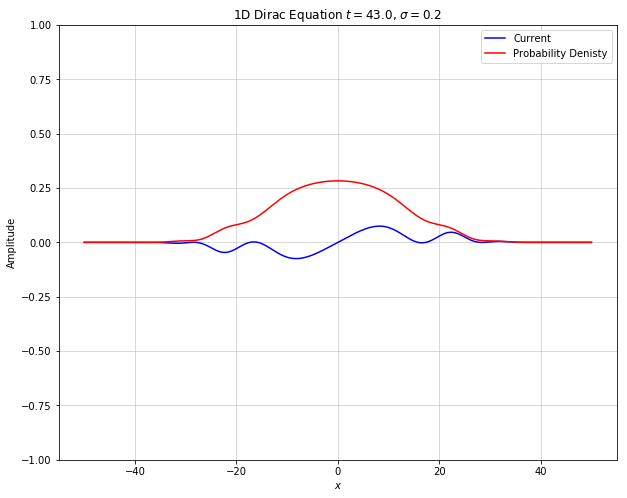

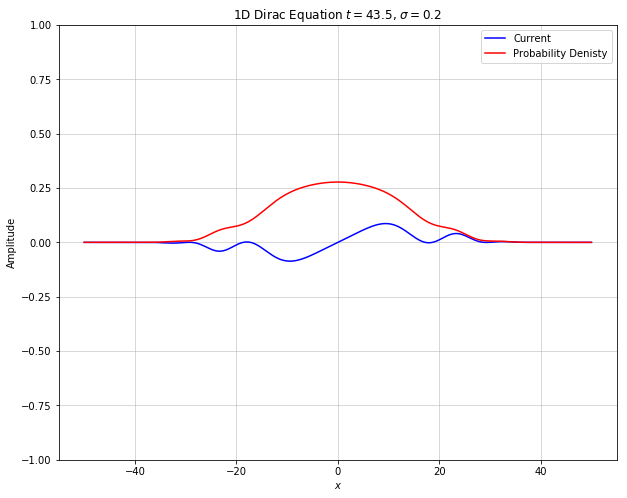

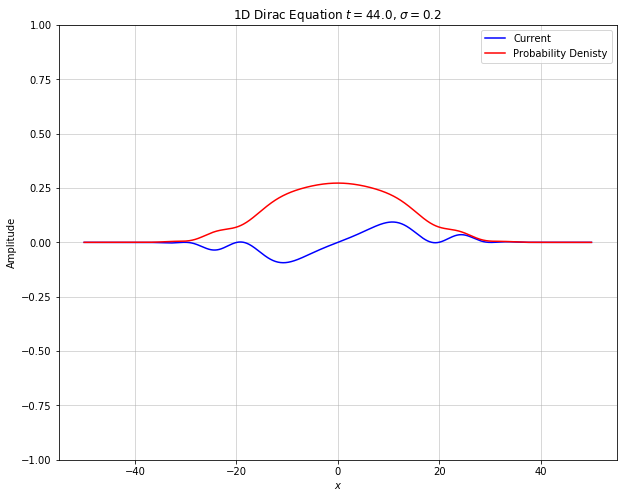

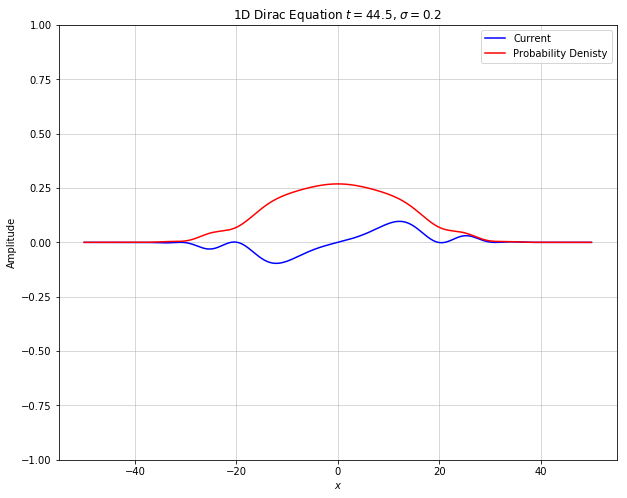

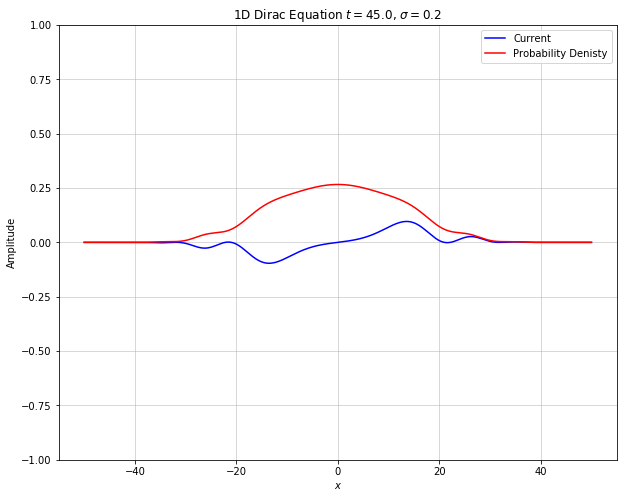

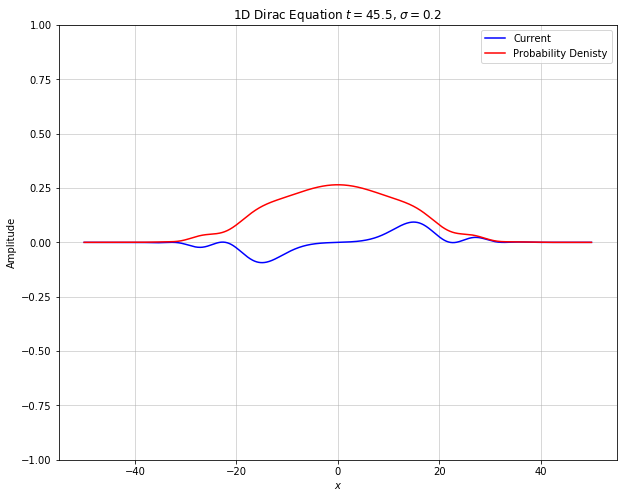

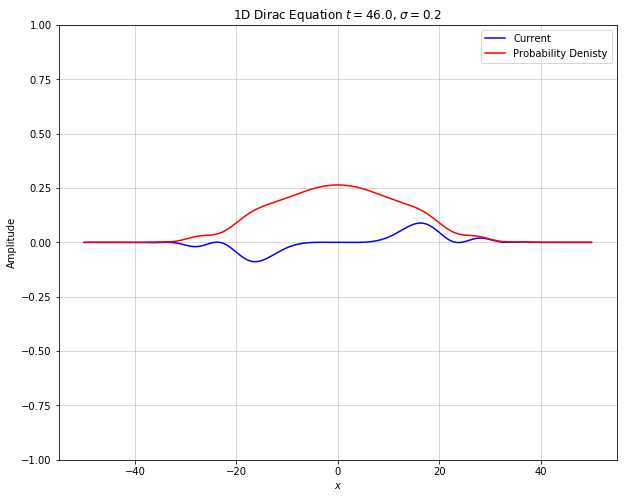

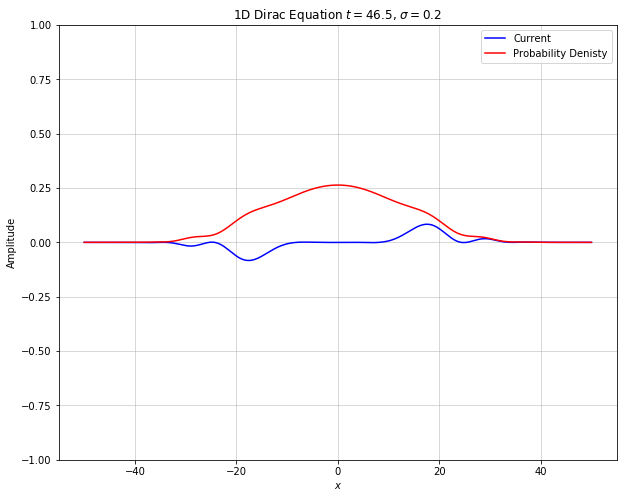

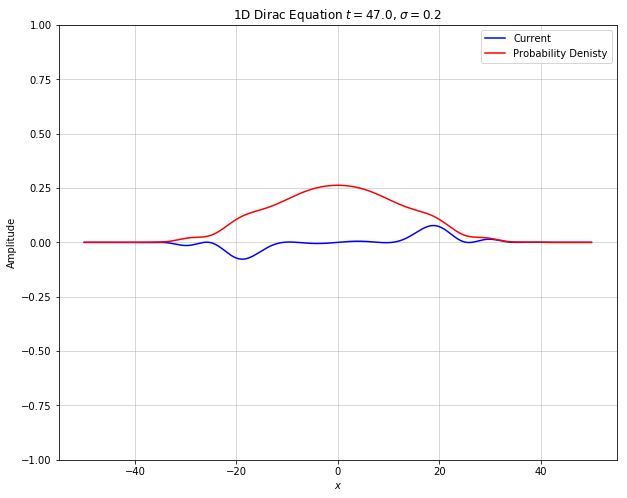

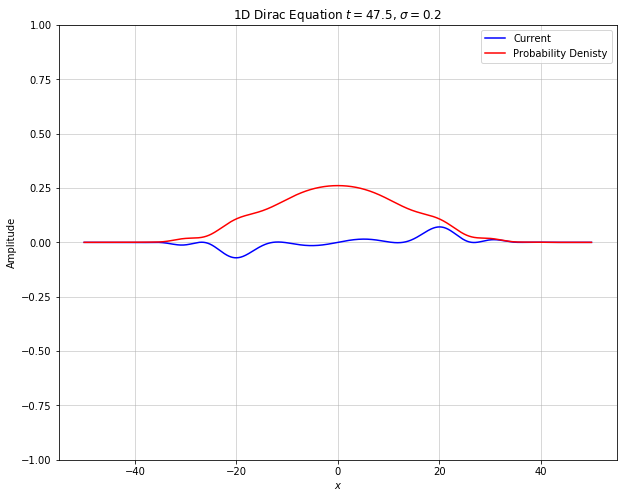

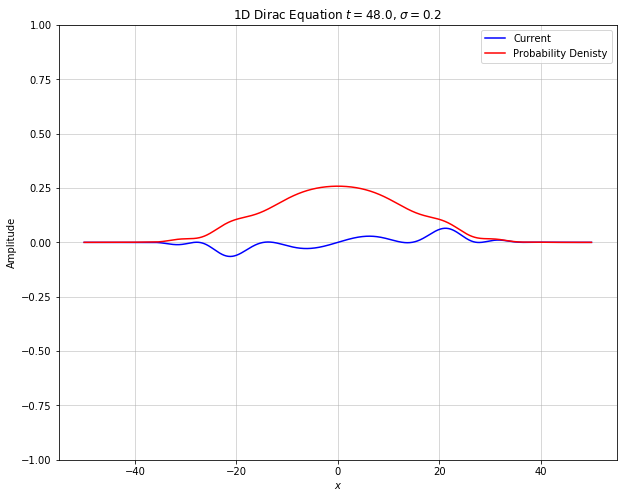

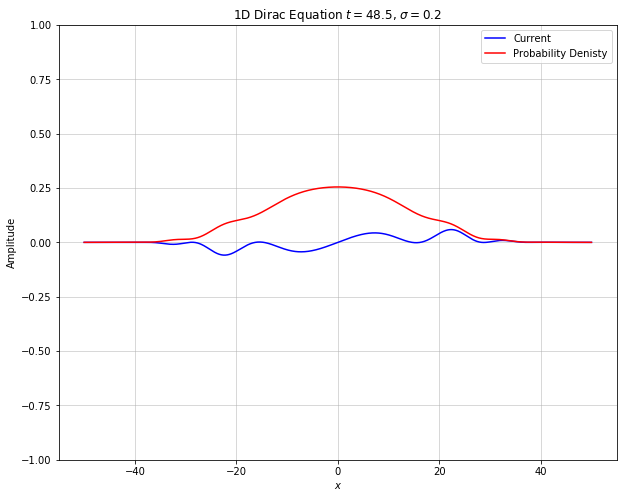

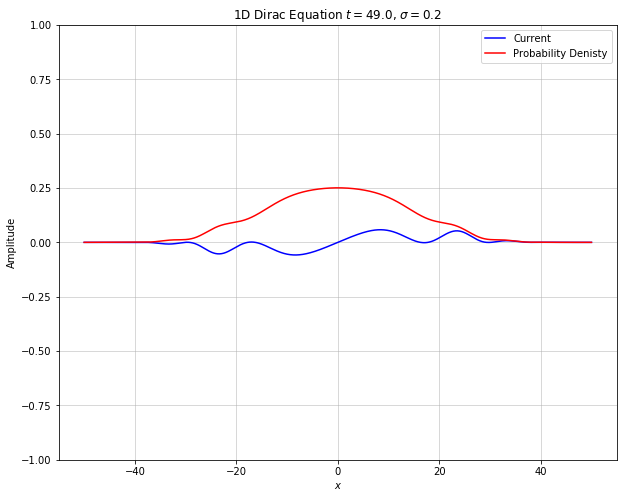

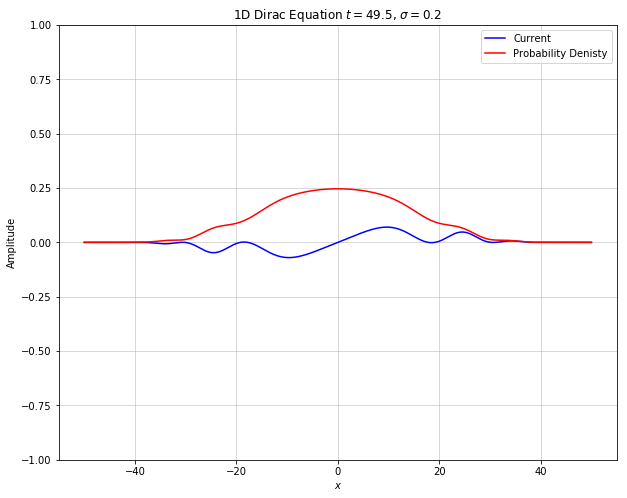

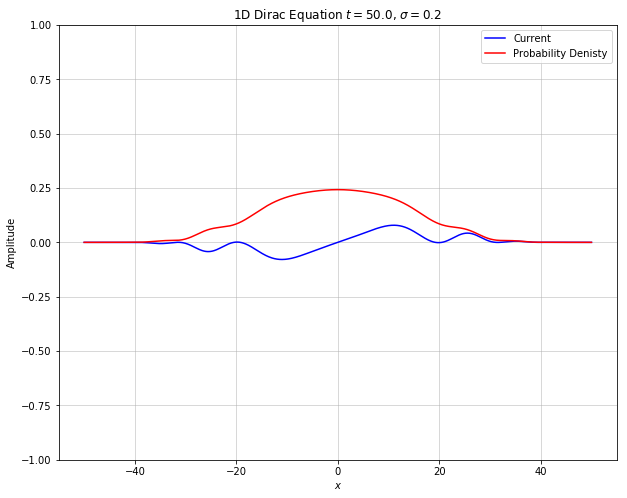

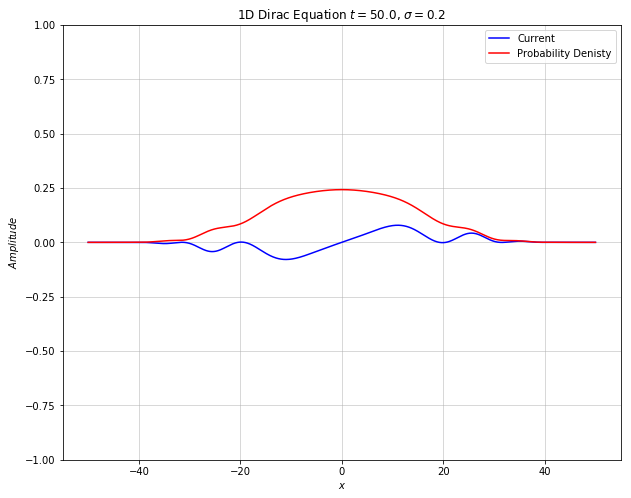

In [6]:
def J(psi1, psi2):
    return np.conj(psi1)*psi2+np.conj(psi2)*psi1

def P(psi1, psi2):
    return np.conj(psi1)*psi1+np.conj(psi2)*psi2

p = P(u, v)
j = J(u, v)
ymax = 1
count = 0
for jj in range(len(j[:,0])):
    if jj%int(0.2*len(u[0,:])) == 0:
        plt.figure(figsize=(10,8))
        plt.plot(x, j[jj,:], 'b', label='Current')
        plt.plot(x, p[jj,:], 'r', label='Probability Denisty')
#         plt.plot(x,j[jj,:].imag, 'b', label='Current I')
        plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[jj], 4), sigma))
        plt.ylabel(r'Amplitude')
        plt.xlabel(r'$x$')
        plt.grid(alpha=0.618)
        plt.legend()
        plt.ylim(-ymax,ymax)
        if count < 10:
            plt.savefig('B00{}'.format(count)+'.png')
        elif 10 <= count < 100:
            plt.savefig('B0{}'.format(count)+'.png')
        elif 100 <= count < 1000:
            plt.savefig('B{}'.format(count)+'.png')
        plt.show()
        count += 1
        
plt.figure(figsize=(10,8))
plt.plot(x, j[jj,:], 'b', label='Current')
plt.plot(x, p[jj,:], 'r', label='Probability Denisty')
# plt.plot(x,j[-1,:].imag, 'b', label='Current I')
plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[jj], 4), sigma))
plt.ylabel(r'$Amplitude$')
plt.xlabel(r'$x$')
plt.grid(alpha=0.618)
plt.legend()
plt.ylim(-ymax,ymax)
plt.savefig('B{}'.format(count)+'.png')
plt.show()

In [48]:
print("Creating GIF")
image_folder = os.fsencode('')

def gif(str: x):
    filenames = []

    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith(('.png')): #, '.png', '.gif', '.jpg'
            filenames.append(filename)

    filenames.sort()  # this iteration technique has no built in order, so sort the frames

    images = list(map(lambda filename: imageio.imread(filename), filenames))

    imageio.mimsave(os.path.join('Dirac'+ x +'.gif'), images, duration=0.05)  # modify the frame duration as needed.gif'), images, duration = 0.04) # modify duration as needed
print("Done")

Creating GIF
Done
